In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib as mpl
 
mpl.rc('font', family='NanumBarunGothic')

In [3]:
df = pd.read_csv("../data/BC_Card_edit.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB
None


,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [4]:
df = df[df['고객소재지_광역시도'] == '서울특별시']
df_1903 = df[df['기준년월'] == 201903]
df_1903.head(10)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58
5,201903,12,뷰티,1210,스킨케어,남성,50대,성인자녀가구,서울특별시,강동구,길동,874323,8
6,201903,12,뷰티,1212,바디케어,남성,40대,초중고자녀가구,서울특별시,강동구,길동,444666,13
7,201903,10,의류,1010,여성의류,여성,40대,신혼영유아가구,서울특별시,강동구,길동,1048087,17
8,201903,15,전자,1510,가전,여성,20대,1인가구,서울특별시,강동구,길동,2429276,17
9,201903,18,건강,1810,건강식품,남성,40대,초중고자녀가구,서울특별시,강동구,길동,529505,17


In [5]:
sigoongu = list(set(df_1903['고객소재지_시군구']))
print(len(sigoongu))

big_category = list(set(df_1903['품목대분류명']))
print(len(big_category))

middle_category = list(set(df_1903['품목중분류명']))
print(len(middle_category))

lifestyle = list(set(df_1903['가구생애주기']))
print(len(lifestyle))

25
13
49
5


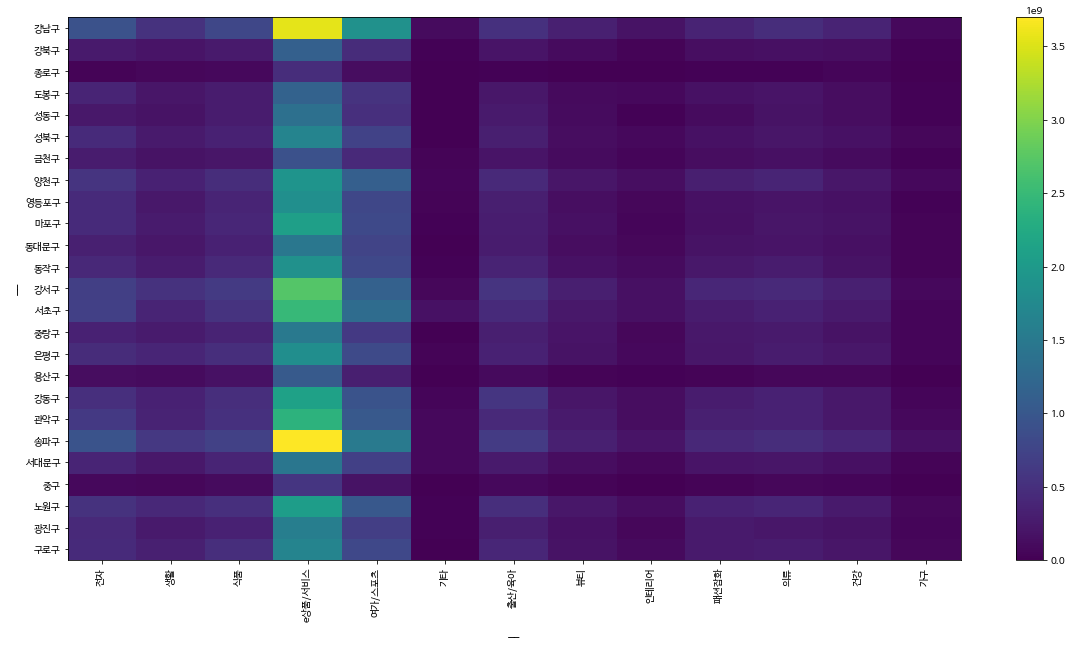

In [6]:
# 시군구 - 매출금액
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_money_large = pd.DataFrame(pack, index=sigoongu)
sigoongu_money_large = sigoongu_money_large.fillna(0)
plt.figure(figsize=(20,10))
plt.pcolor(sigoongu_money_large)
plt.xticks(np.arange(0.5, len(sigoongu_money_large.columns), 1), sigoongu_money_large.columns, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_money_large.index), 1), sigoongu_money_large.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [9]:
sigoongu_money_large.head()

,전자,생활,식품,e상품/서비스,여가/스포츠,기타,출산/육아,뷰티,인테리어,패션잡화,의류,건강,가구
구로구,435127996,319793548,487458146,1669006251,805341766,6862999,397438918,180522385,96469755,249018944,280940490,203984490,65115316.0
광진구,427679471,249657009,336681070,1566833634,665677415,21525721,311744594,159610549,70676346,247165319,218843070,175361808,47275017.0
노원구,527585097,407686148,500485188,2047131810,1008487740,26534390,490436036,228365501,121035812,344719406,379453112,250930661,67597343.0
중구,83836166,71274921,103049361,572538817,176923548,4314015,80195308,35700304,12876899,43018248,61633918,44209239,9207674.0
서대문구,375544365,236494281,365378809,1449500793,701040971,75613148,246440019,119964862,62424975,188927753,207870302,155057771,39333210.0


In [11]:
# 클러스터링
# 시군구 - 매출건수

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_money_large.values
kmeans = KMeans(n_clusters=5).fit(datapoints)

sigoongu_money_large['cluster_id'] = kmeans.labels_
for i in range(5):
    temp = sigoongu_money_large[sigoongu_money_large['cluster_id'] == i]
    print(temp['cluster_id'])

광진구     0
서대문구    0
중랑구     0
동대문구    0
성북구     0
성동구     0
도봉구     0
강북구     0
Name: cluster_id, dtype: int32
송파구    1
강남구    1
Name: cluster_id, dtype: int32
중구     2
용산구    2
금천구    2
종로구    2
Name: cluster_id, dtype: int32
관악구    3
서초구    3
강서구    3
Name: cluster_id, dtype: int32
구로구     4
노원구     4
강동구     4
은평구     4
동작구     4
마포구     4
영등포구    4
양천구     4
Name: cluster_id, dtype: int32


In [12]:
# 데이터 프레임 재구성
dict = {}
sigoongu_name = sigoongu_money_large.index
cluster_label = sigoongu_money_large['cluster_id'].tolist()

for i in range(25):
    dict[sigoongu_name[i]] = cluster_label[i]

temp = []
for index, row in df_1903.iterrows():
    temp_dict = row.to_dict()
    temp_dict['large_money_cluster'] = dict[row['고객소재지_시군구']]
    temp.append(temp_dict)
df_1903 = pd.DataFrame(temp)

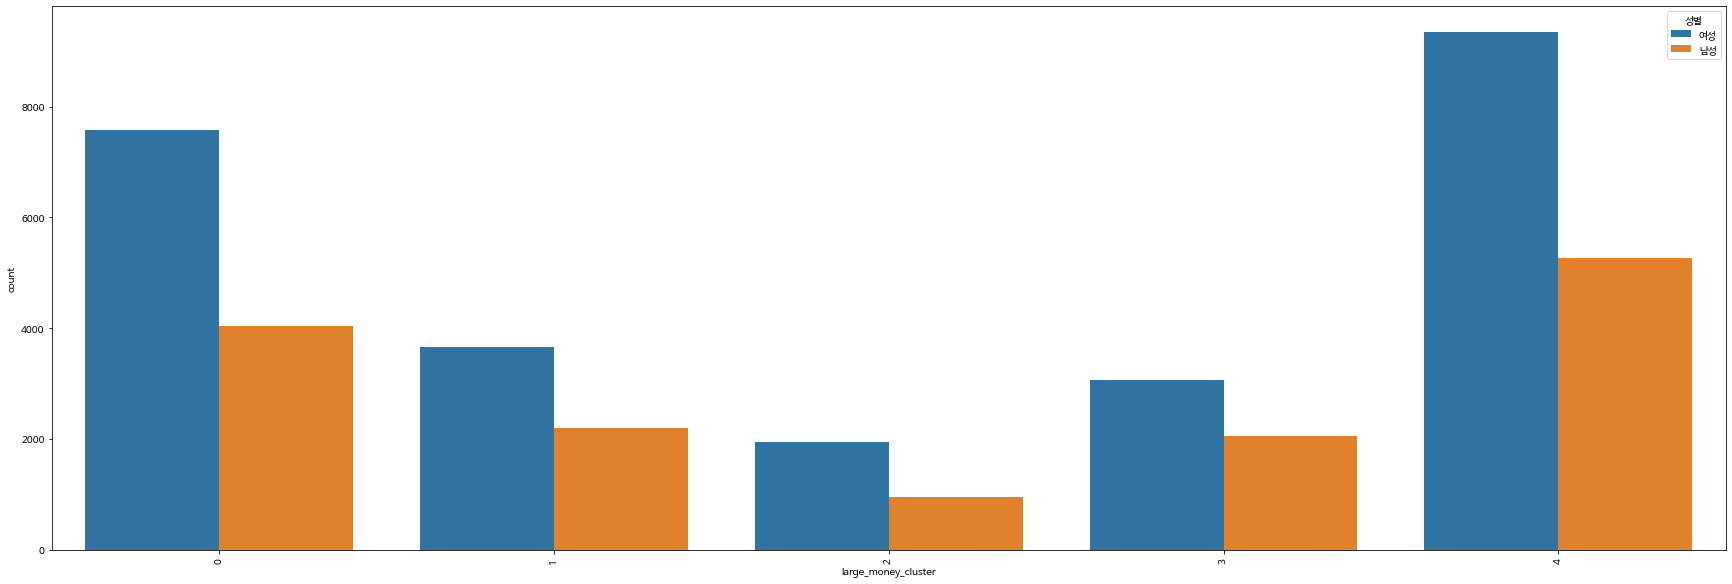

In [14]:
plt.figure(figsize=(30,10))
sns.countplot(x='large_money_cluster', hue = '성별', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

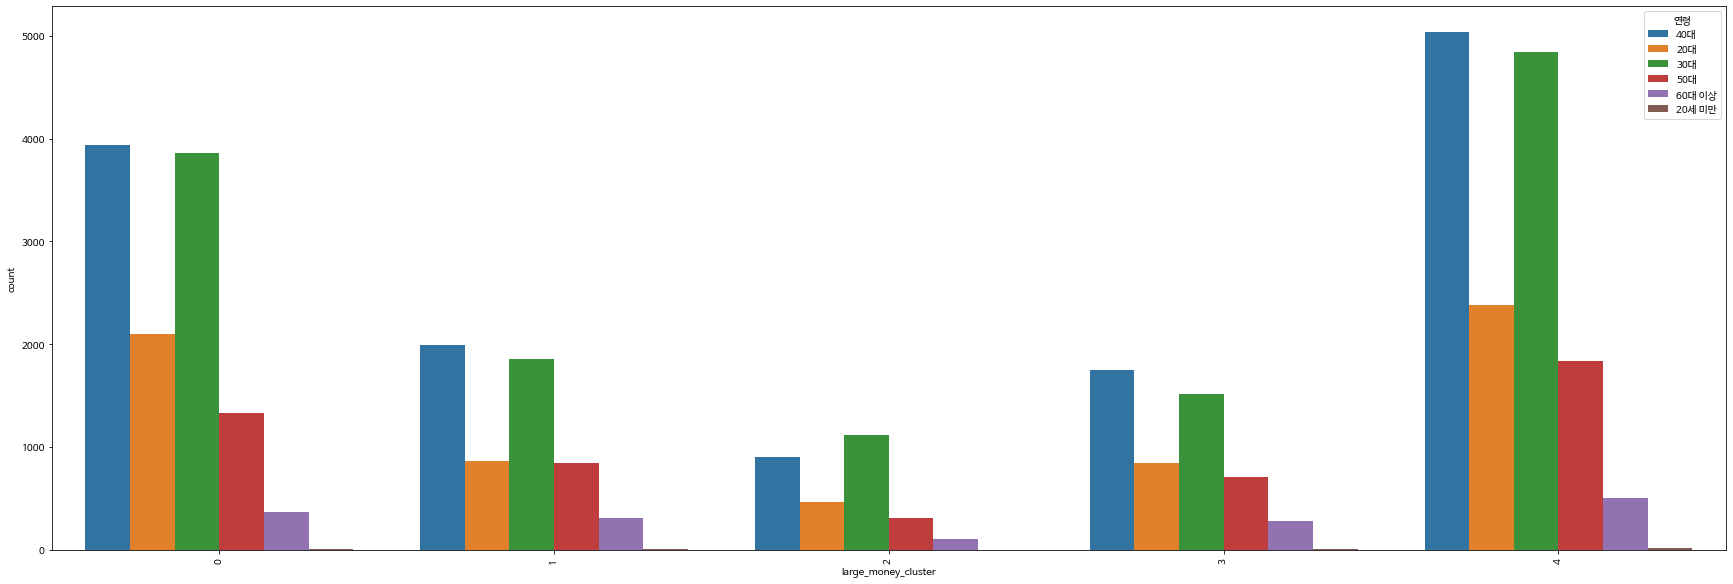

In [15]:
plt.figure(figsize=(30,10))
sns.countplot(x='large_money_cluster', hue = '연령', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

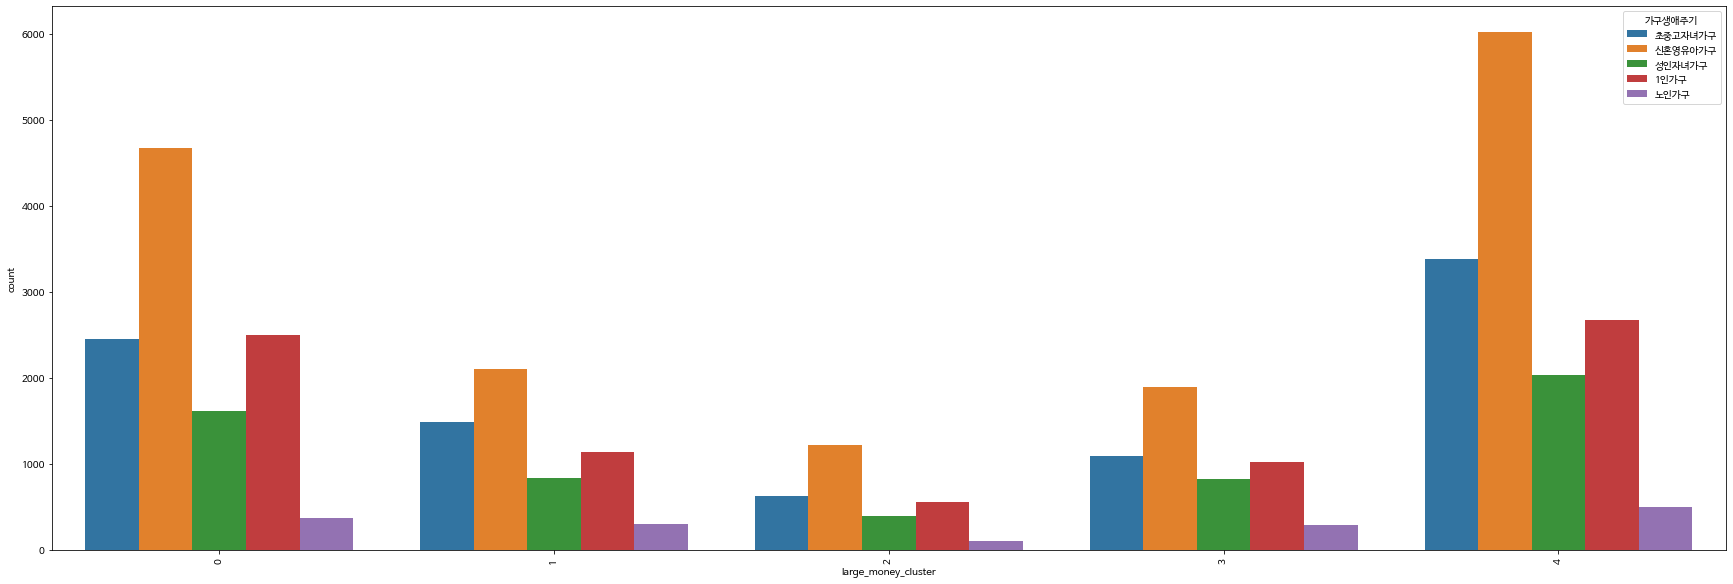

In [16]:
plt.figure(figsize=(30,10))
sns.countplot(x='large_money_cluster', hue = '가구생애주기', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

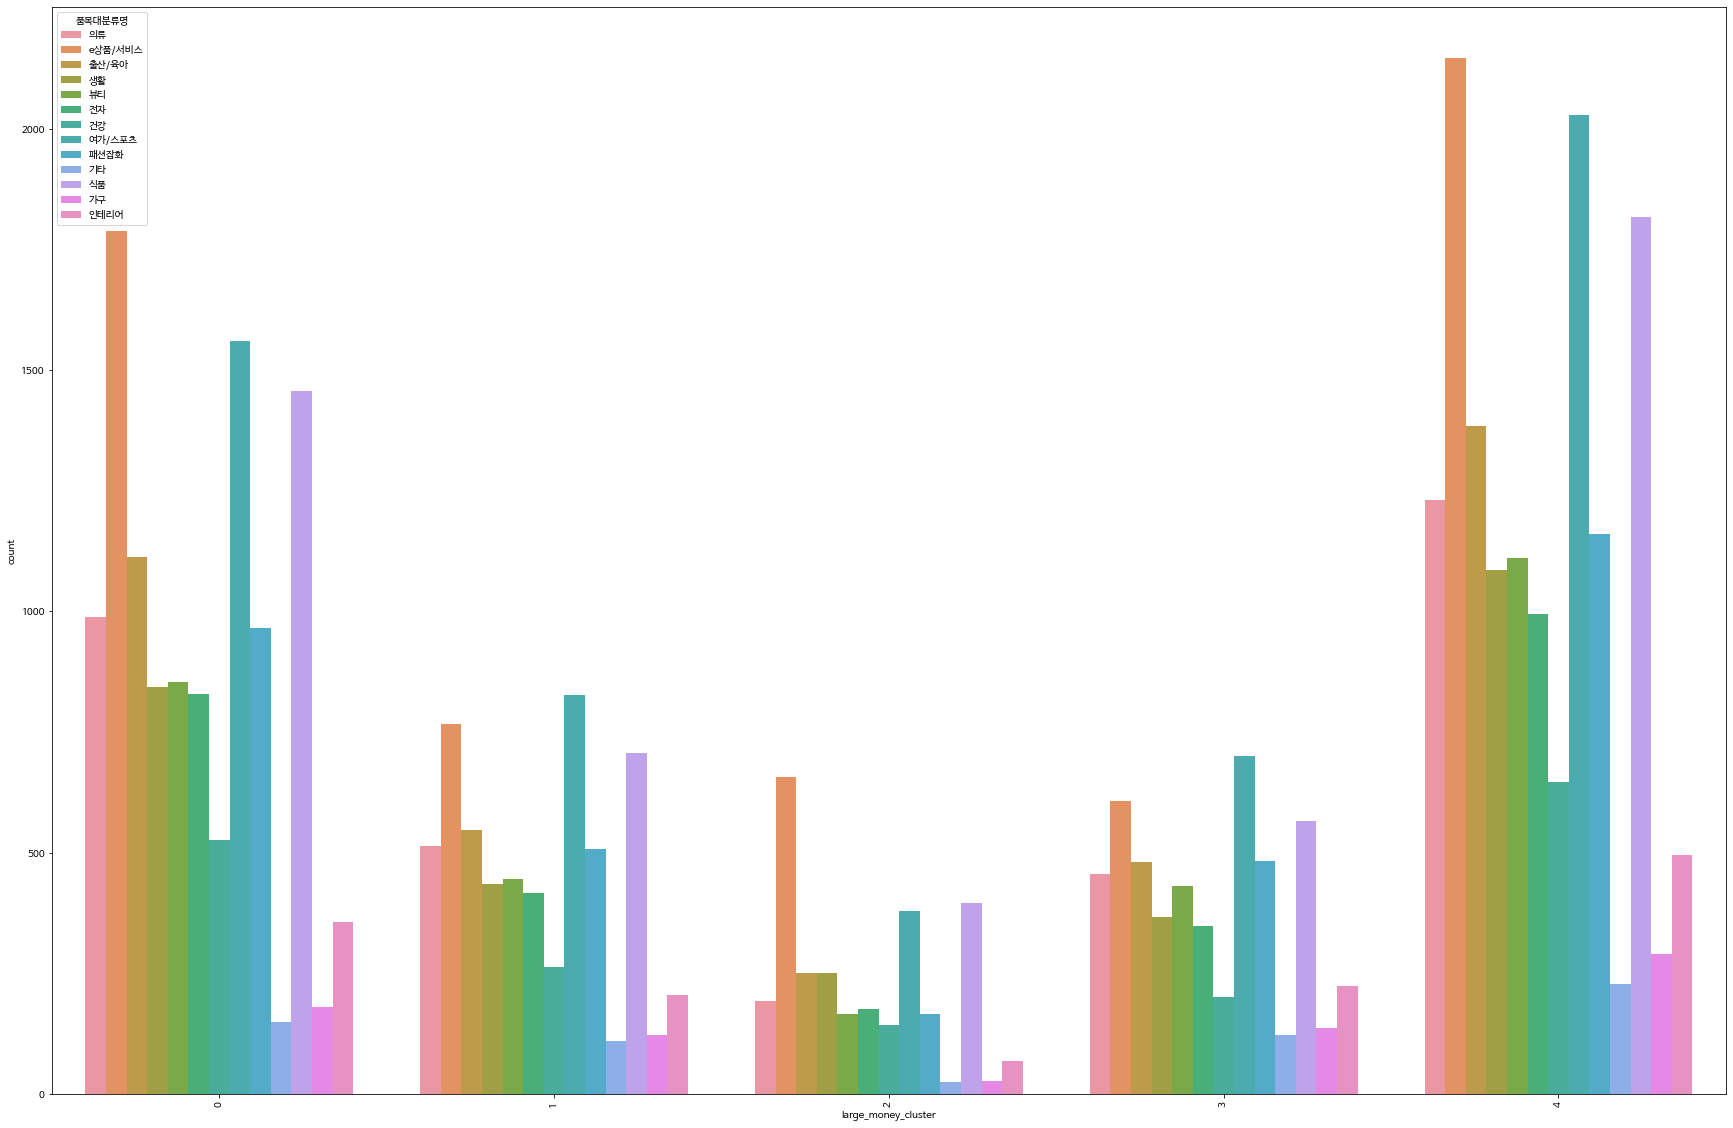

In [17]:
plt.figure(figsize=(30,20))
sns.countplot(x='large_money_cluster', hue = '품목대분류명', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

In [20]:
# cluster == 0
df_1903_cluster0 = df_1903[df_1903['large_money_cluster'] == 0]
cluster0_list = []
cluster0_list = df_1903_cluster0['고객소재지_시군구'].unique()

iscluster0 = []
for i in range(len(cluster0_list)):
    iscluster0.append(df_1903_cluster0['고객소재지_시군구'] == cluster0_list[i])
    
cluster0 = []
for i in range(len(cluster0_list)):
    cluster0.append(df_1903_cluster0[iscluster0[i]])

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

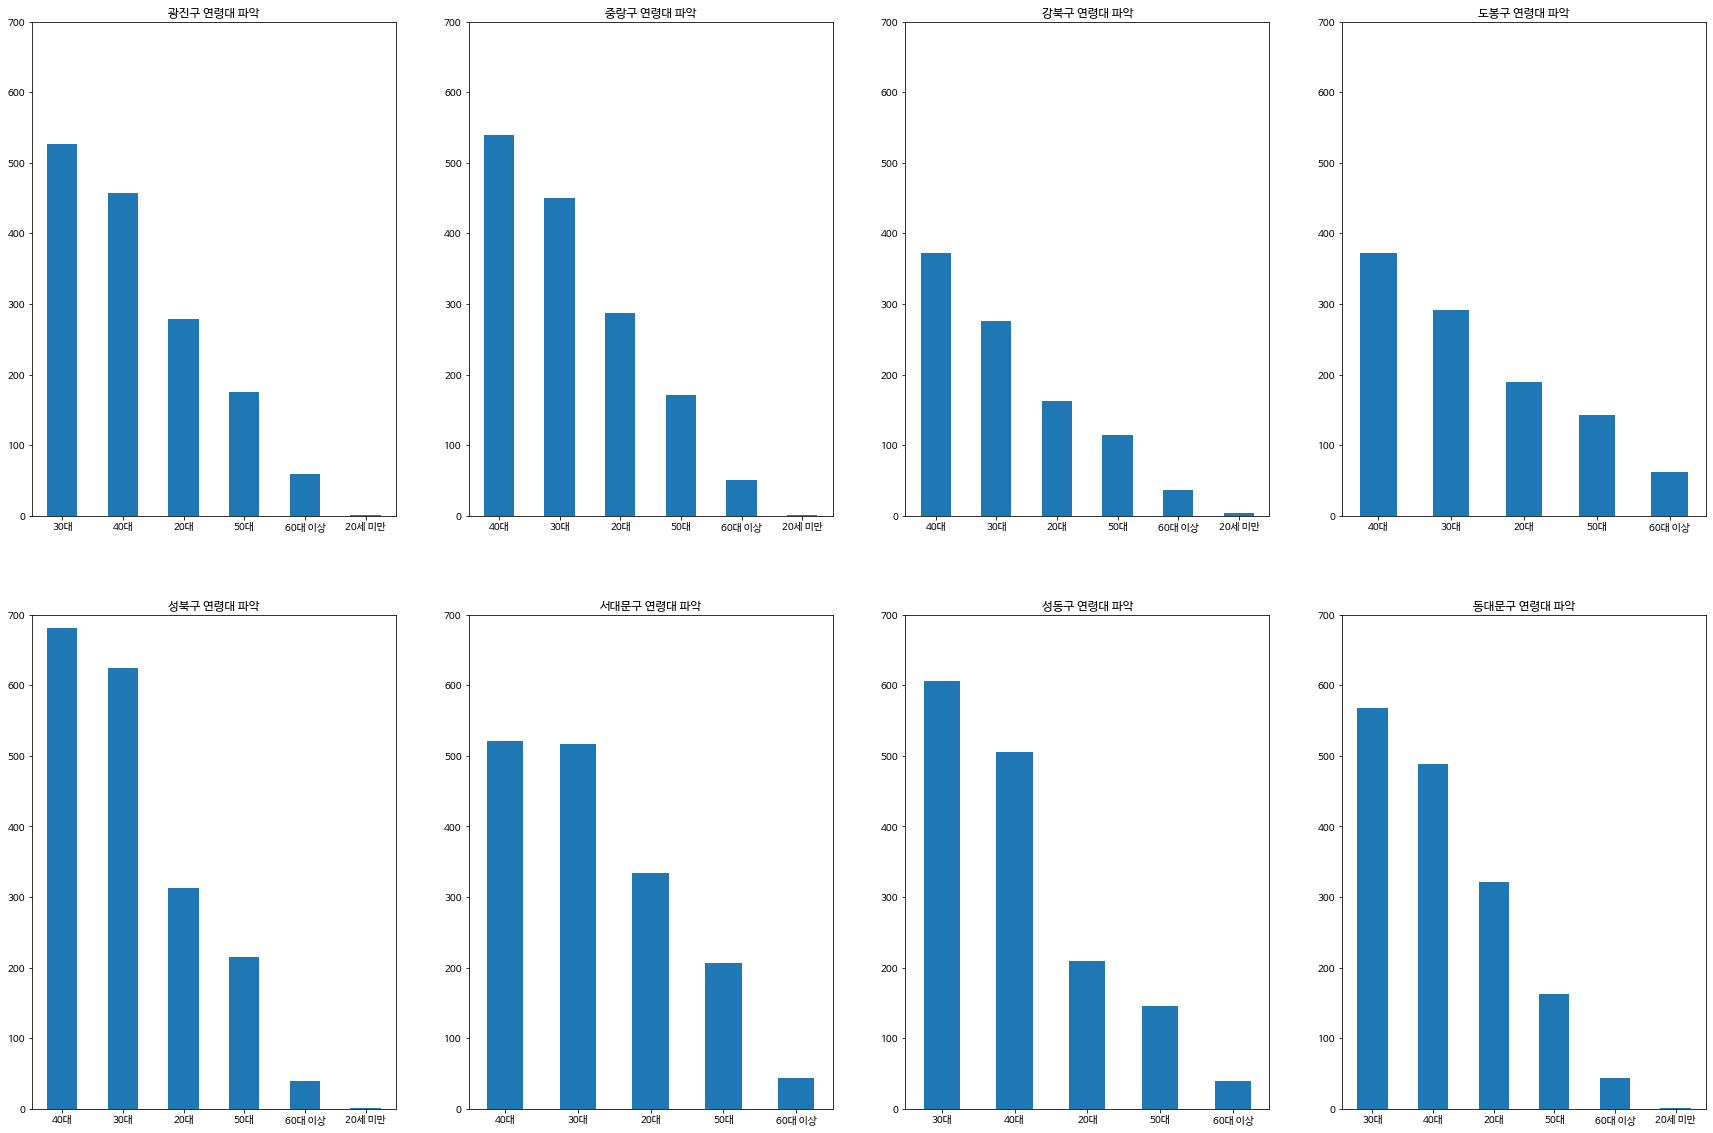

In [51]:
plt.figure(figsize = (30,20))

for j in range(len(cluster0_list)):
    plt.subplot(2,4,j+1)
    cluster0[j]['연령'].value_counts().plot.bar()
    plt.ylim([0, 700])
    plt.xticks(rotation=0)
    plt.title(cluster0_list[j]+ ' 연령대 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

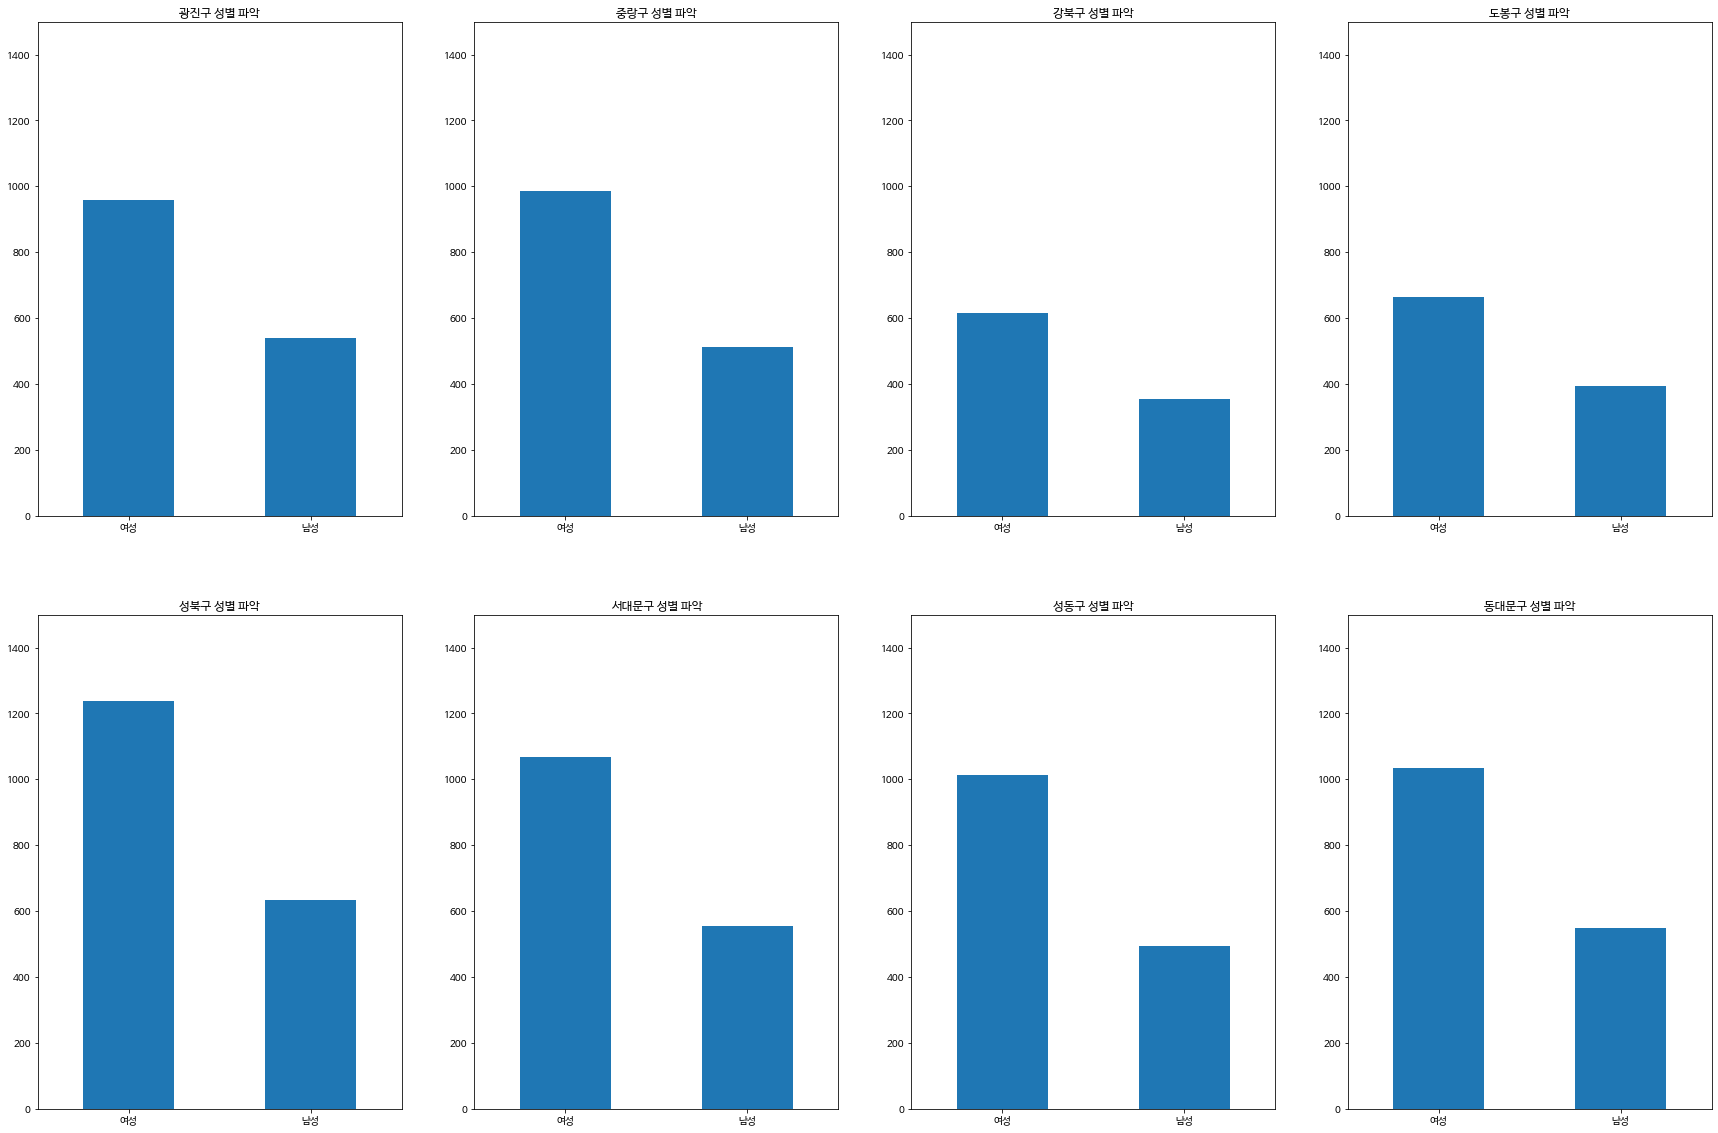

In [54]:
plt.figure(figsize = (30,20))

for j in range(len(cluster0_list)):
    plt.subplot(2,4,j+1)
    cluster0[j]['성별'].value_counts().plot.bar()
    plt.ylim([0, 1500])
    plt.xticks(rotation=0)
    plt.title(cluster0_list[j]+ ' 성별 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

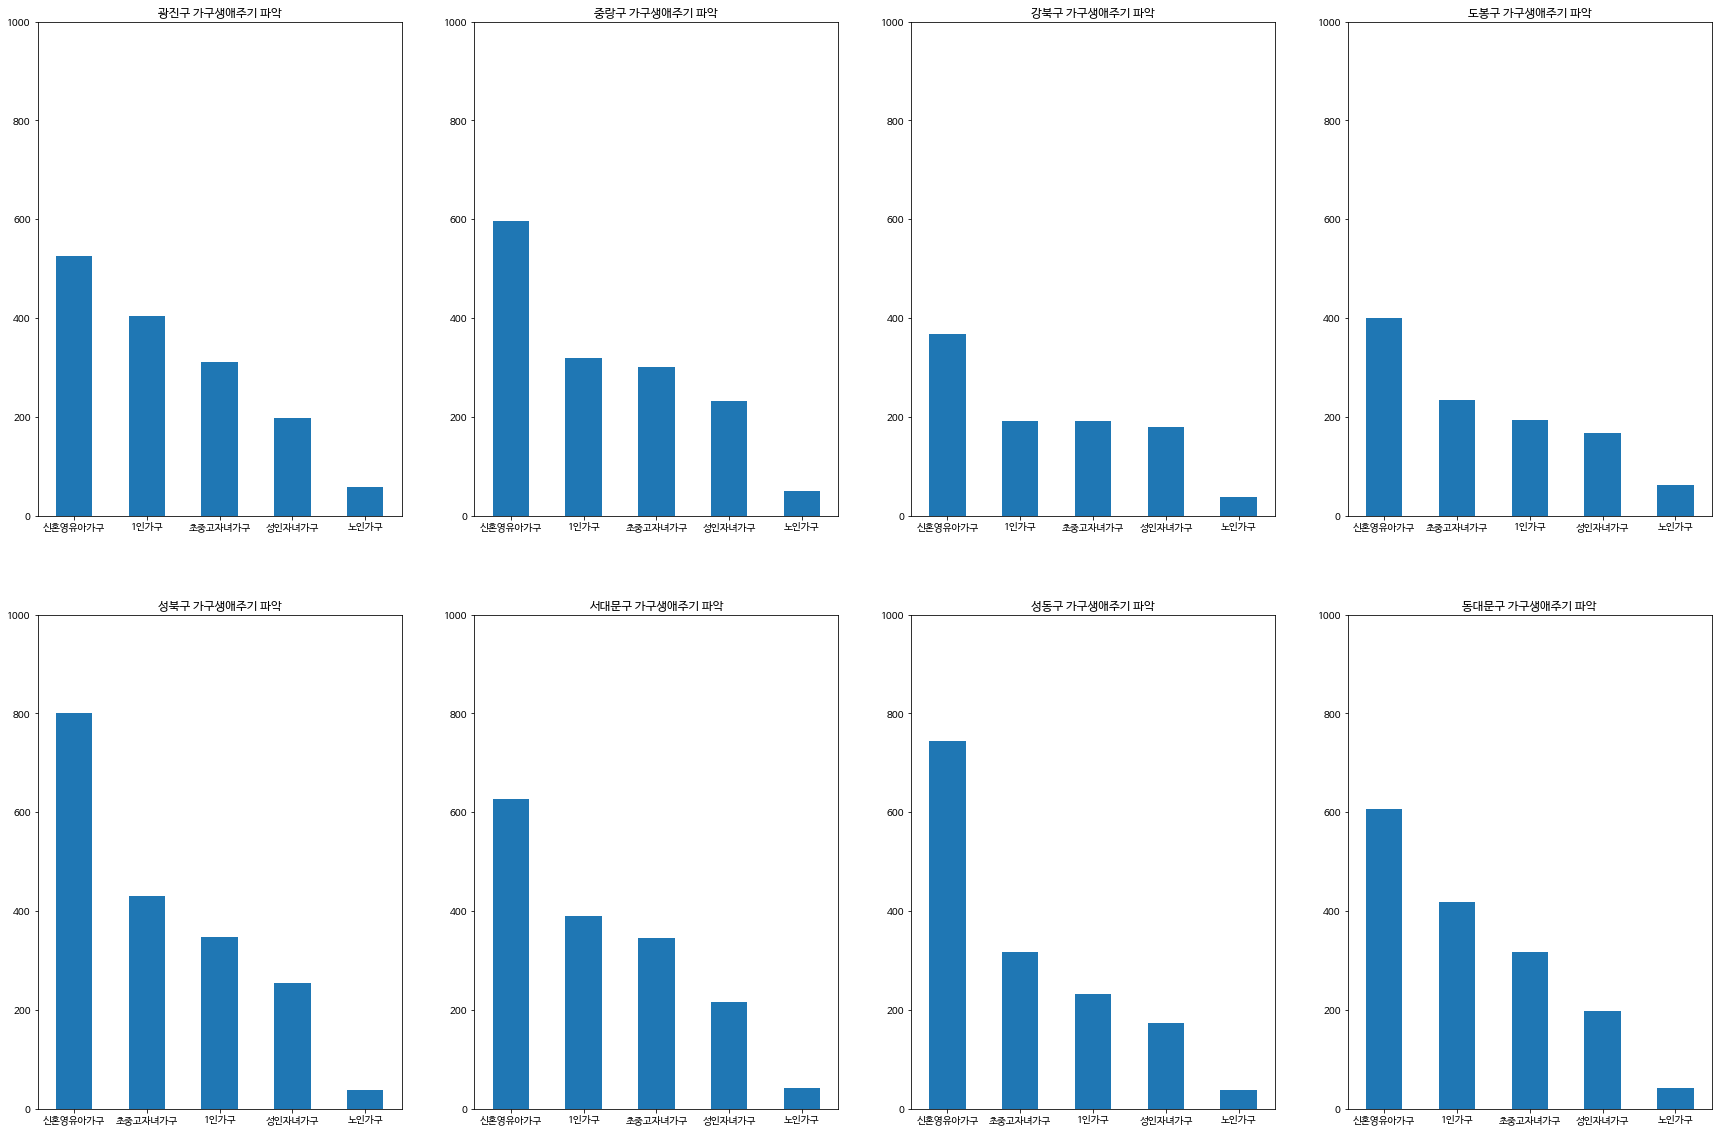

In [23]:
plt.figure(figsize = (30,20))

for j in range(len(cluster0_list)):
    plt.subplot(2,4,j+1)
    cluster0[j]['가구생애주기'].value_counts().plot.bar()
    plt.ylim([0, 1000])
    plt.xticks(rotation=0)
    plt.title(cluster0_list[j]+ ' 가구생애주기 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

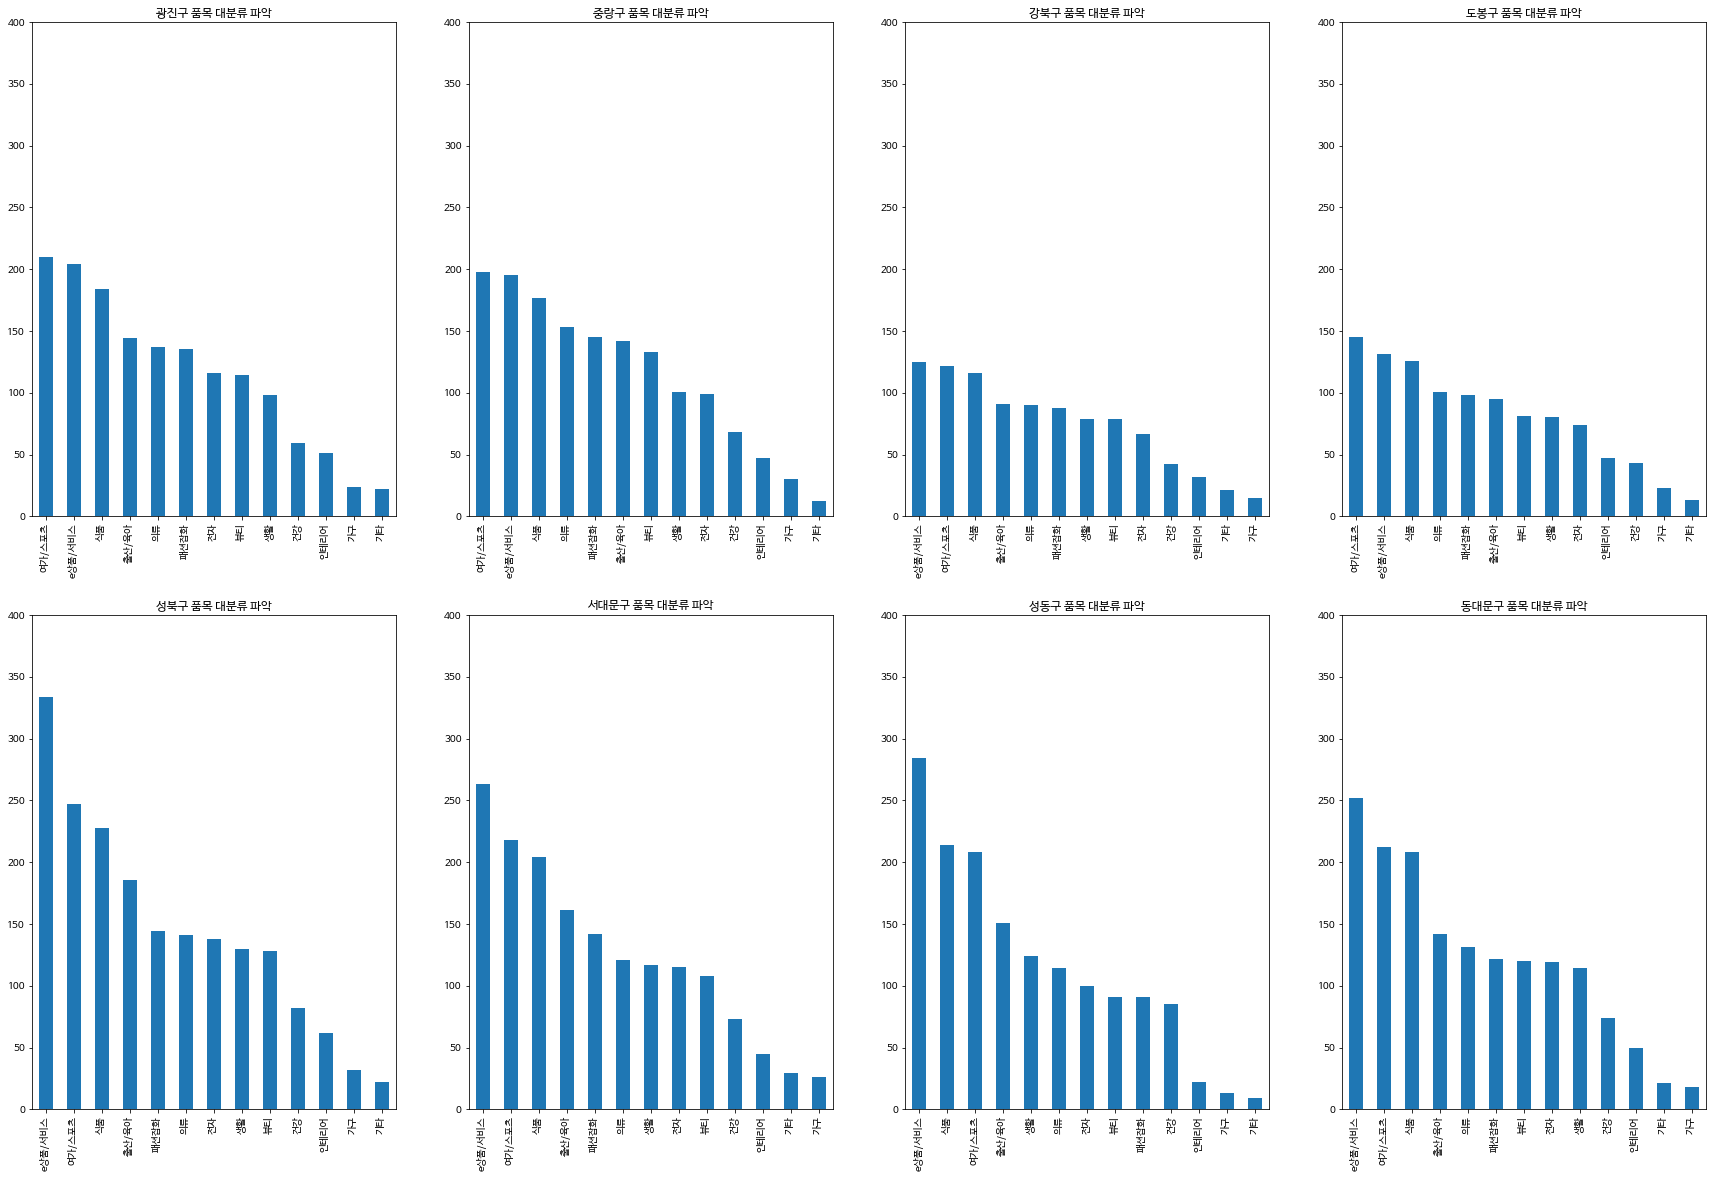

In [57]:
plt.figure(figsize = (30,20))

for j in range(len(cluster0_list)):
    plt.subplot(2,4,j+1)
    cluster0[j]['품목대분류명'].value_counts().plot.bar()
    plt.ylim([0, 400])
    plt.title(cluster0_list[j]+ ' 품목 대분류 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

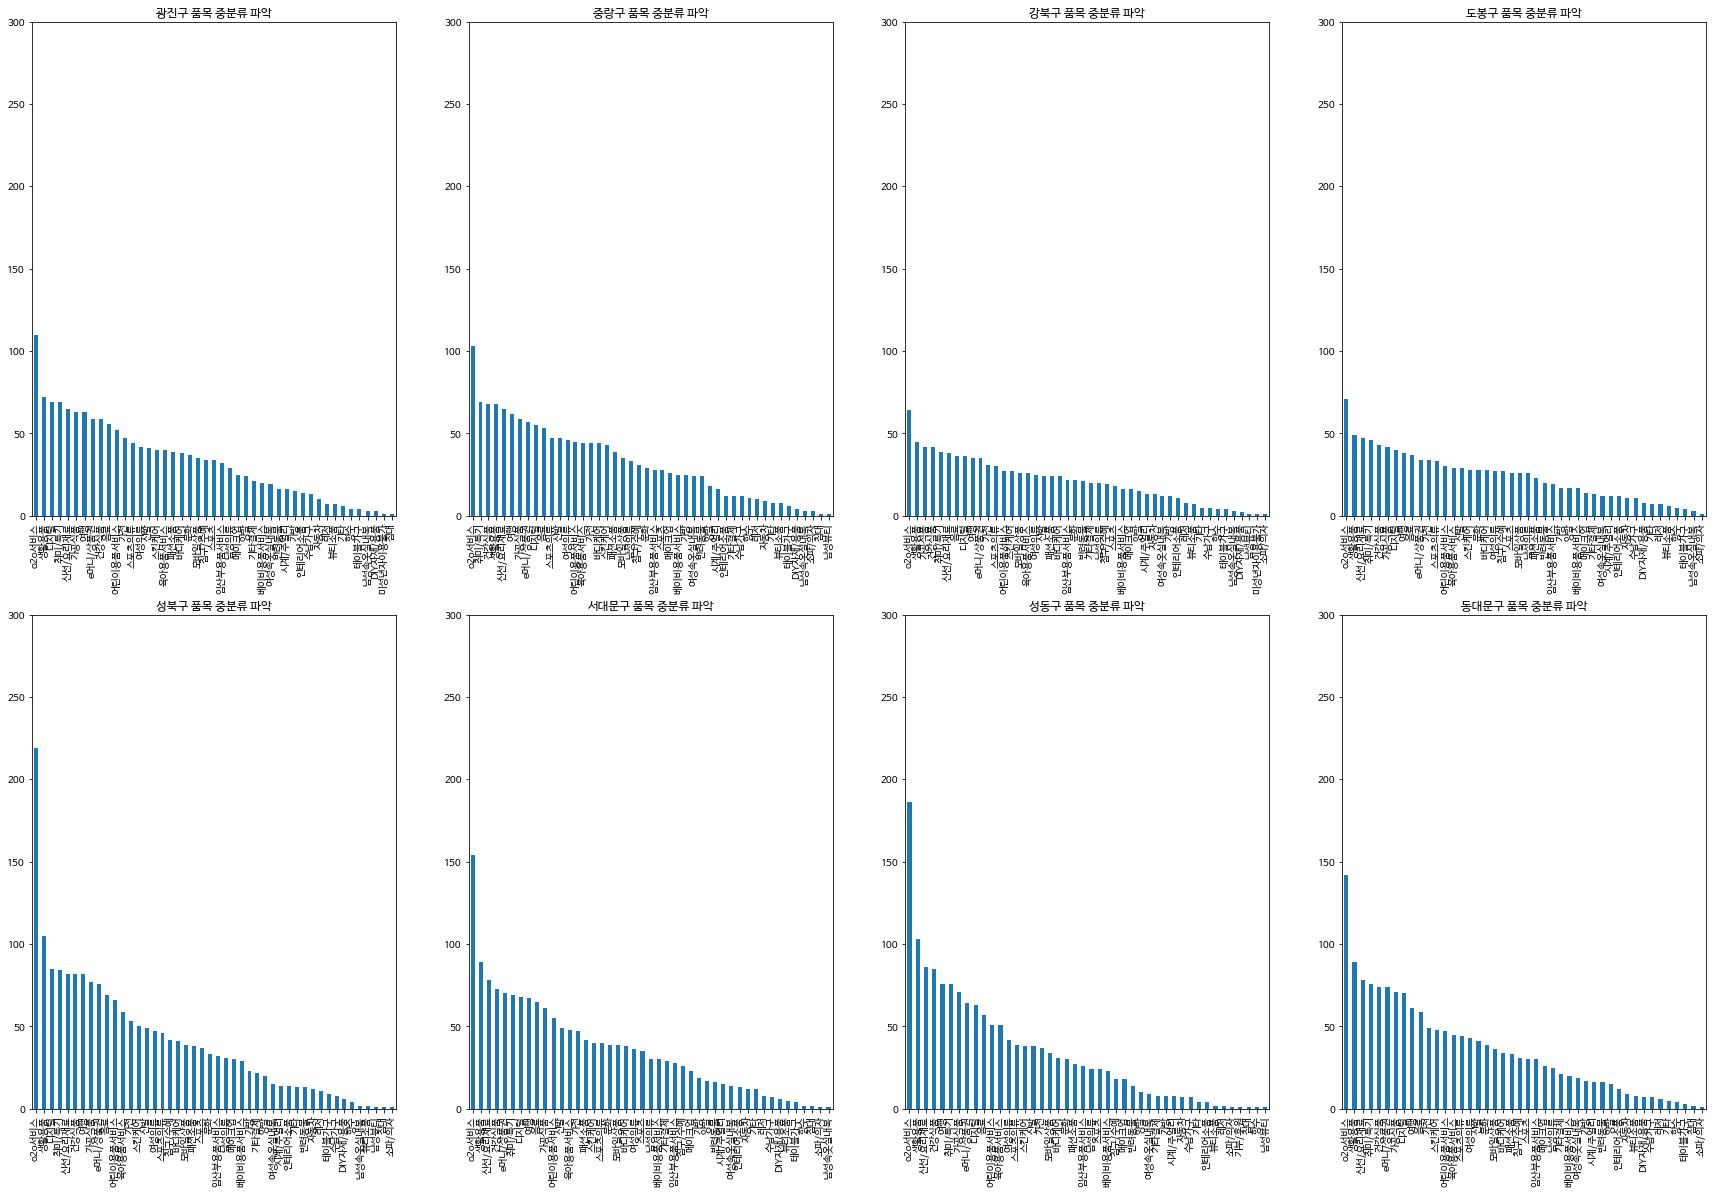

In [25]:
plt.figure(figsize = (30,20))

for j in range(len(cluster0_list)):
    plt.subplot(2,4,j+1)
    cluster0[j]['품목중분류명'].value_counts().plot.bar()
    plt.ylim([0, 300])
    plt.title(cluster0_list[j]+ ' 품목 중분류 파악')

plt.plot

In [26]:
# cluster == 1
df_1903_cluster1 = df_1903[df_1903['large_money_cluster'] == 1]
cluster1_list = []
cluster1_list = df_1903_cluster1['고객소재지_시군구'].unique()

print(cluster1_list)

iscluster1 = []
for i in range(len(cluster1_list)):
    iscluster1.append(df_1903_cluster1['고객소재지_시군구'] == cluster1_list[i])
    
cluster1 = []
for i in range(len(cluster1_list)):
    cluster1.append(df_1903_cluster1[iscluster1[i]])

['송파구' '강남구']


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

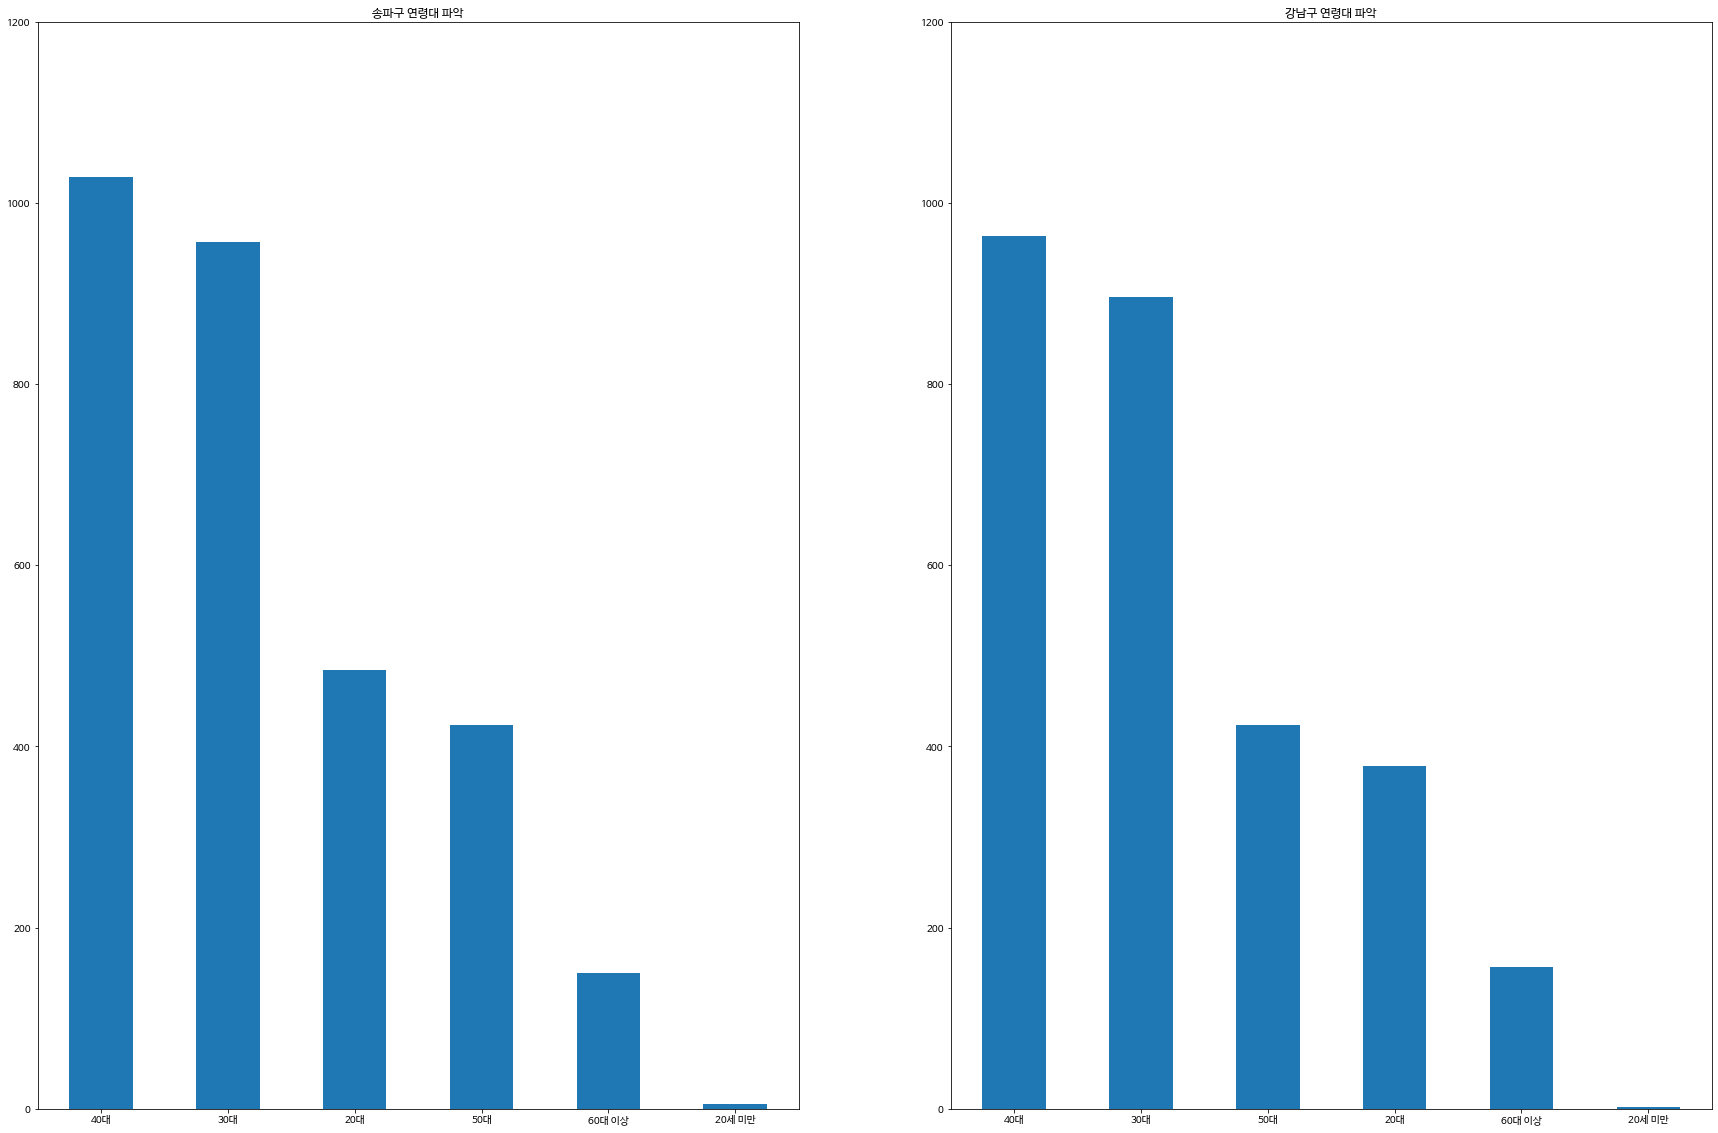

In [27]:
plt.figure(figsize = (30,20))

for j in range(len(cluster1_list)):
    plt.subplot(1,2,j+1)
    cluster1[j]['연령'].value_counts().plot.bar()
    plt.ylim([0, 1200])
    plt.xticks(rotation=0)
    plt.title(cluster1_list[j]+ ' 연령대 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

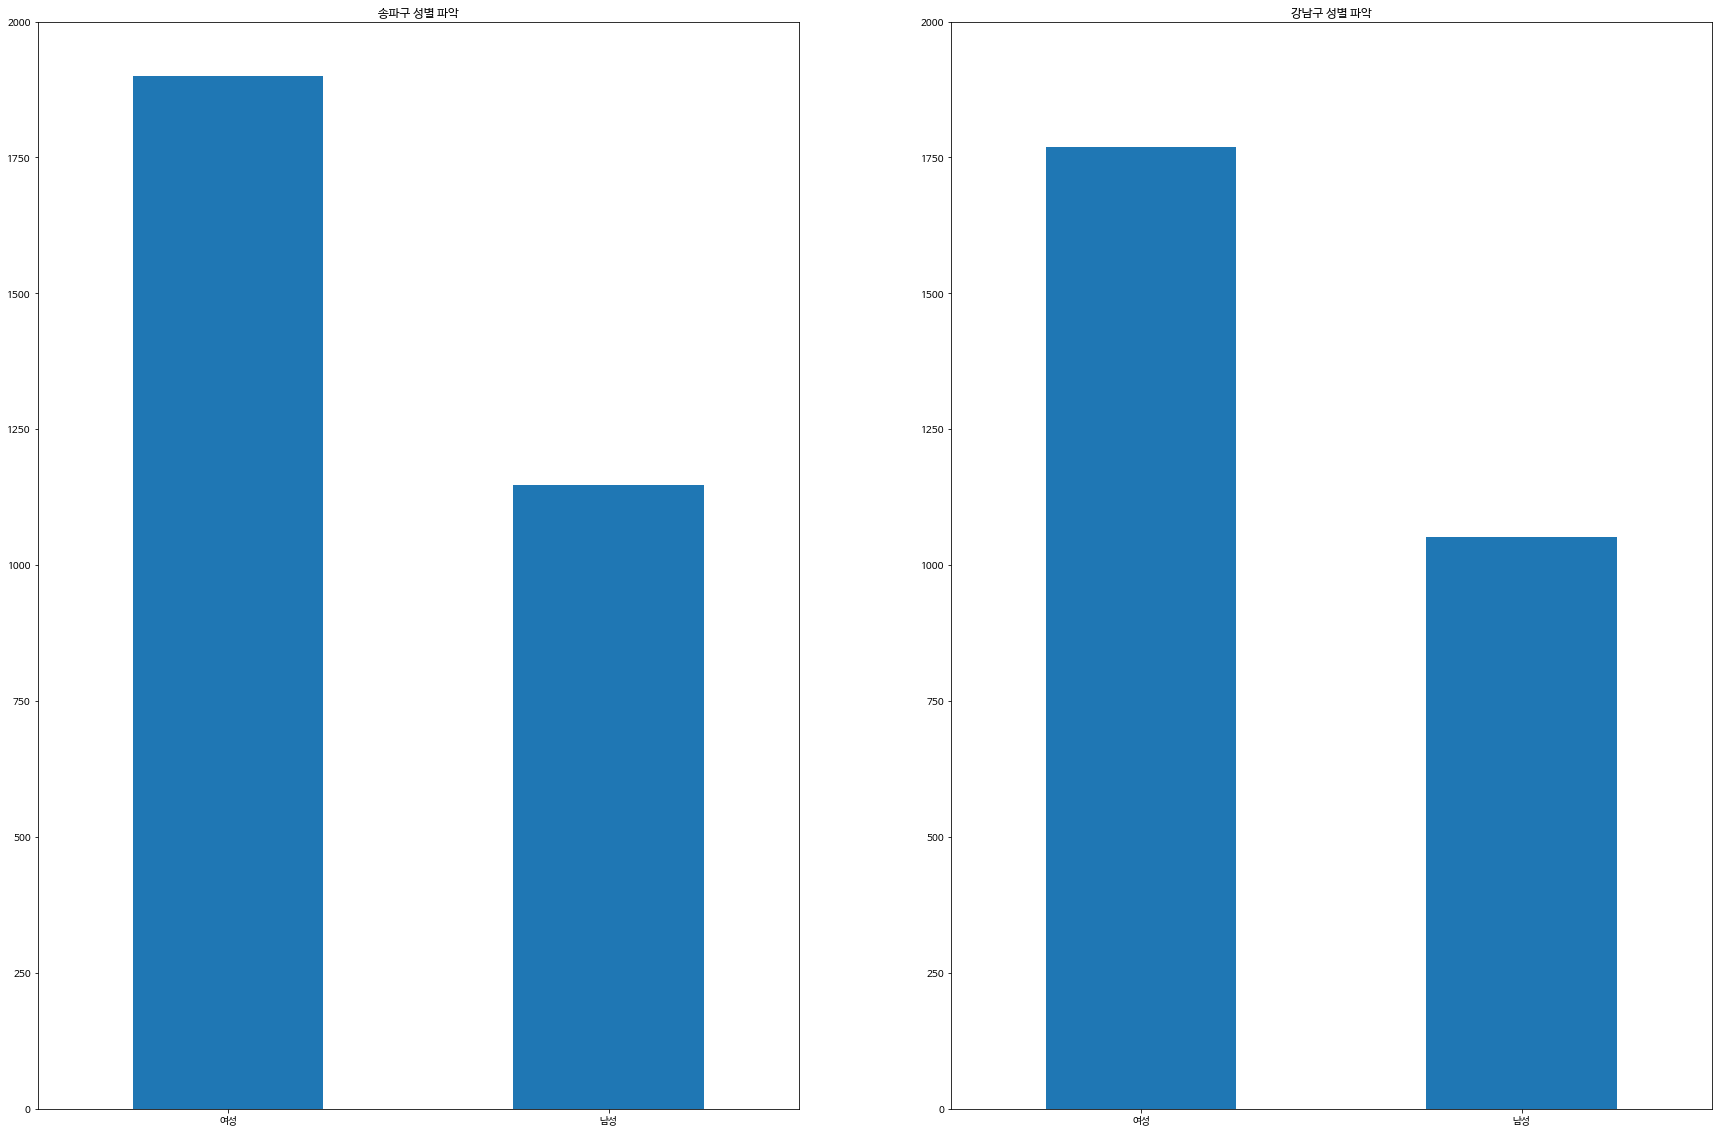

In [28]:
plt.figure(figsize = (30,20))

for j in range(len(cluster1_list)):
    plt.subplot(1,2,j+1)
    cluster1[j]['성별'].value_counts().plot.bar()
    plt.ylim([0, 2000])
    plt.xticks(rotation=0)
    plt.title(cluster1_list[j]+ ' 성별 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

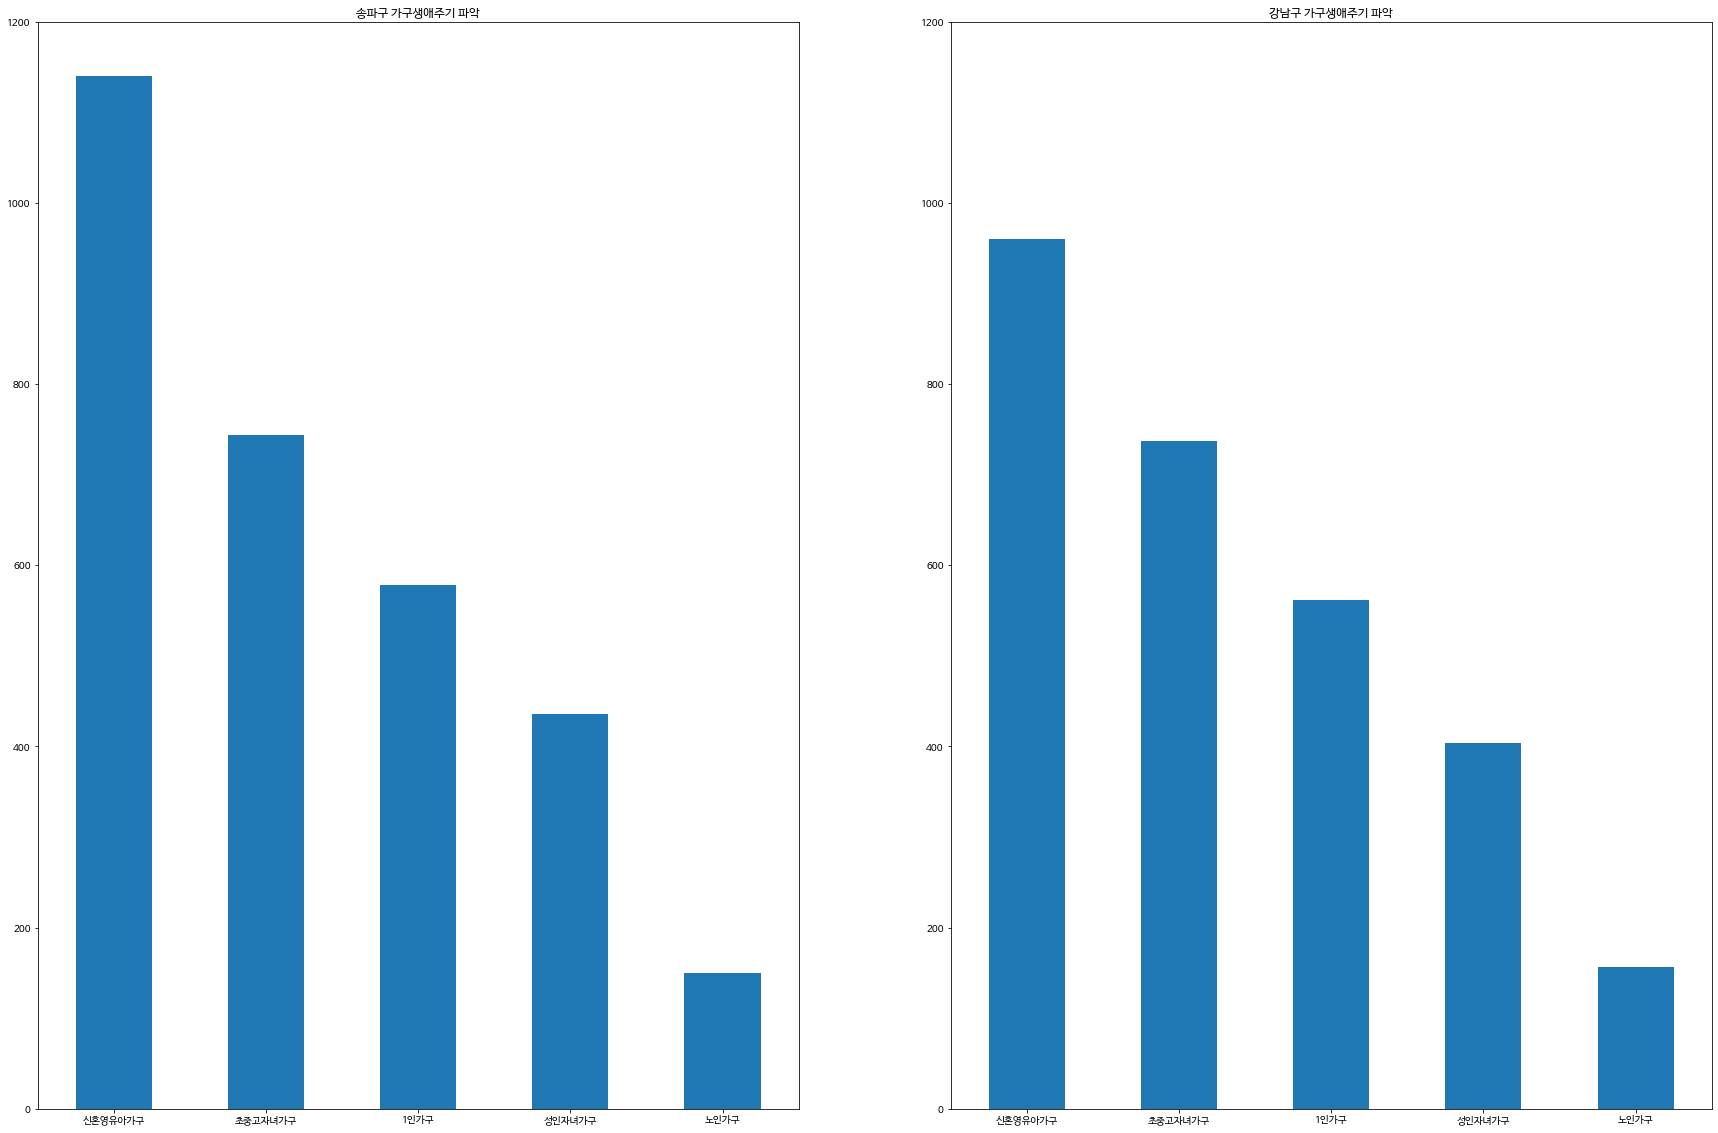

In [29]:
plt.figure(figsize = (30,20))

for j in range(len(cluster1_list)):
    plt.subplot(1,2,j+1)
    cluster1[j]['가구생애주기'].value_counts().plot.bar()
    plt.ylim([0, 1200])
    plt.xticks(rotation=0)
    plt.title(cluster1_list[j]+ ' 가구생애주기 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

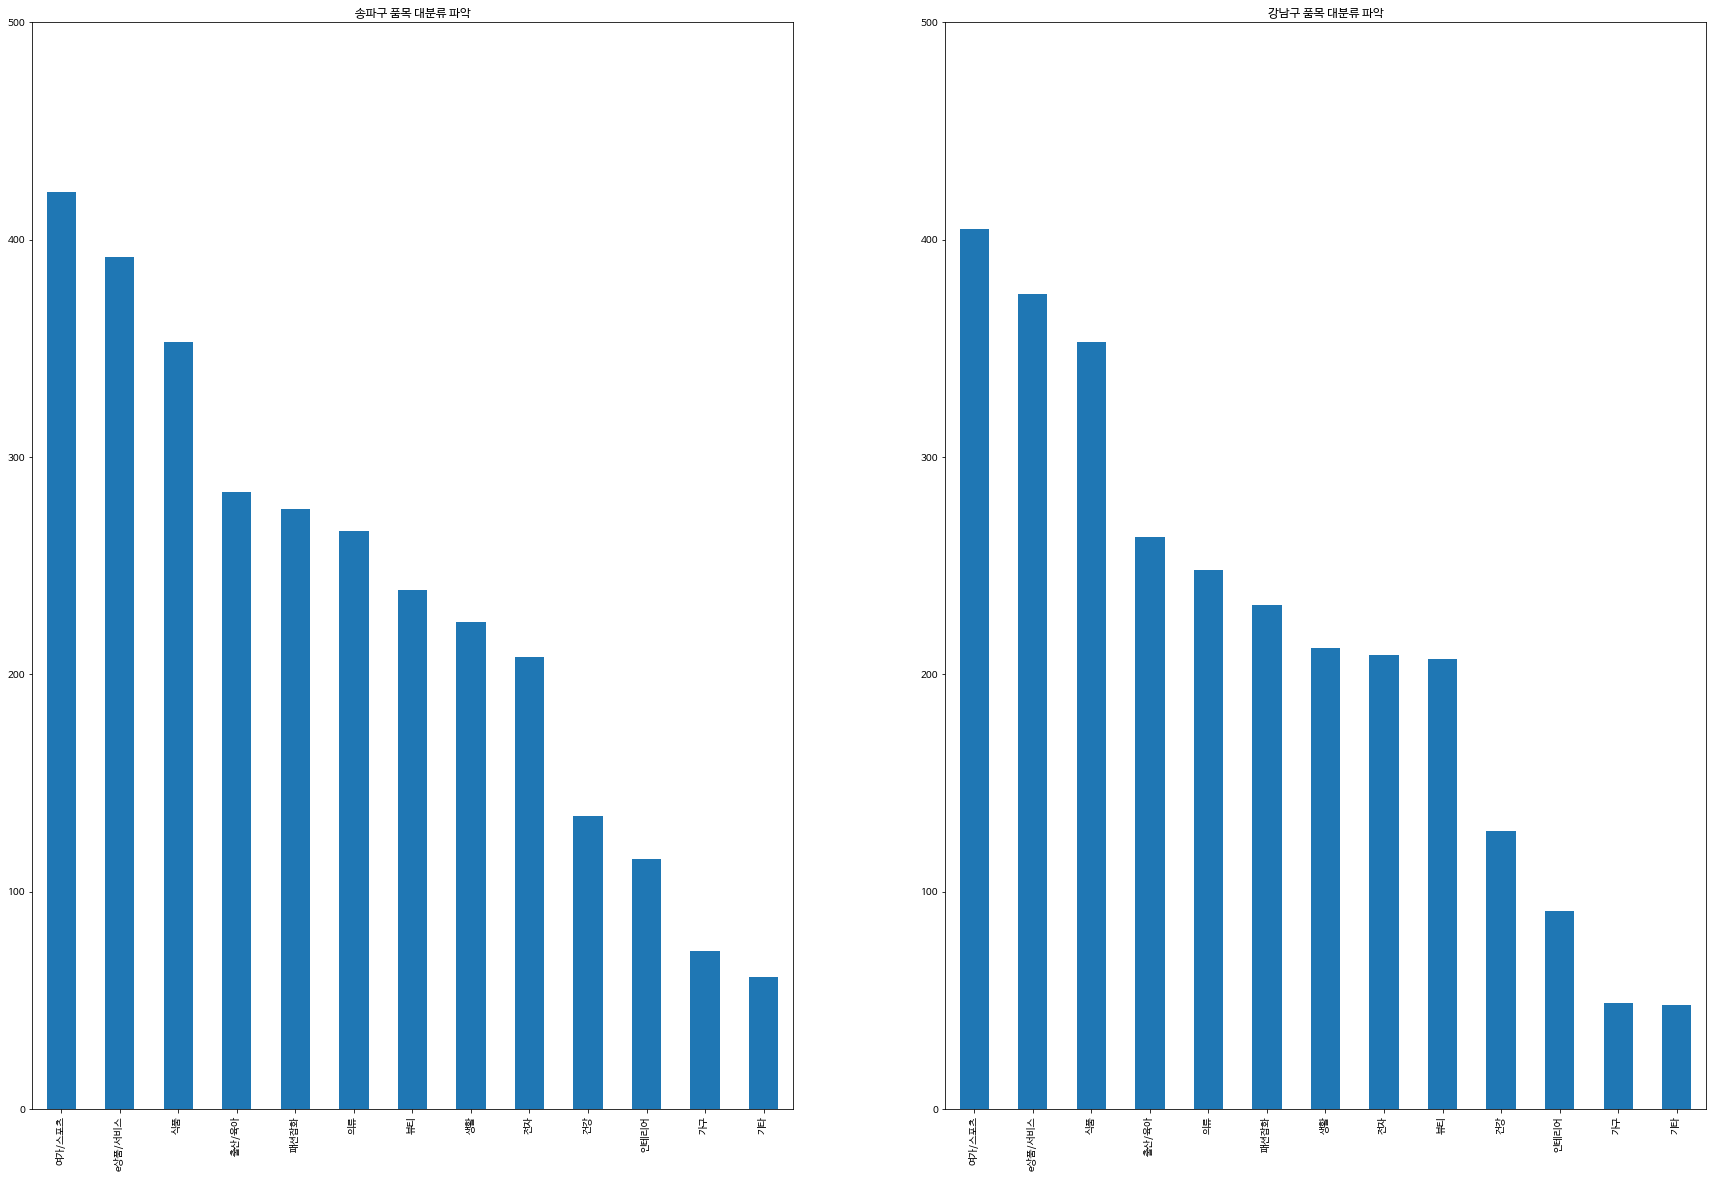

In [30]:
plt.figure(figsize = (30,20))

for j in range(len(cluster1_list)):
    plt.subplot(1,2,j+1)
    cluster1[j]['품목대분류명'].value_counts().plot.bar()
    plt.ylim([0, 500])
    plt.title(cluster1_list[j]+ ' 품목 대분류 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

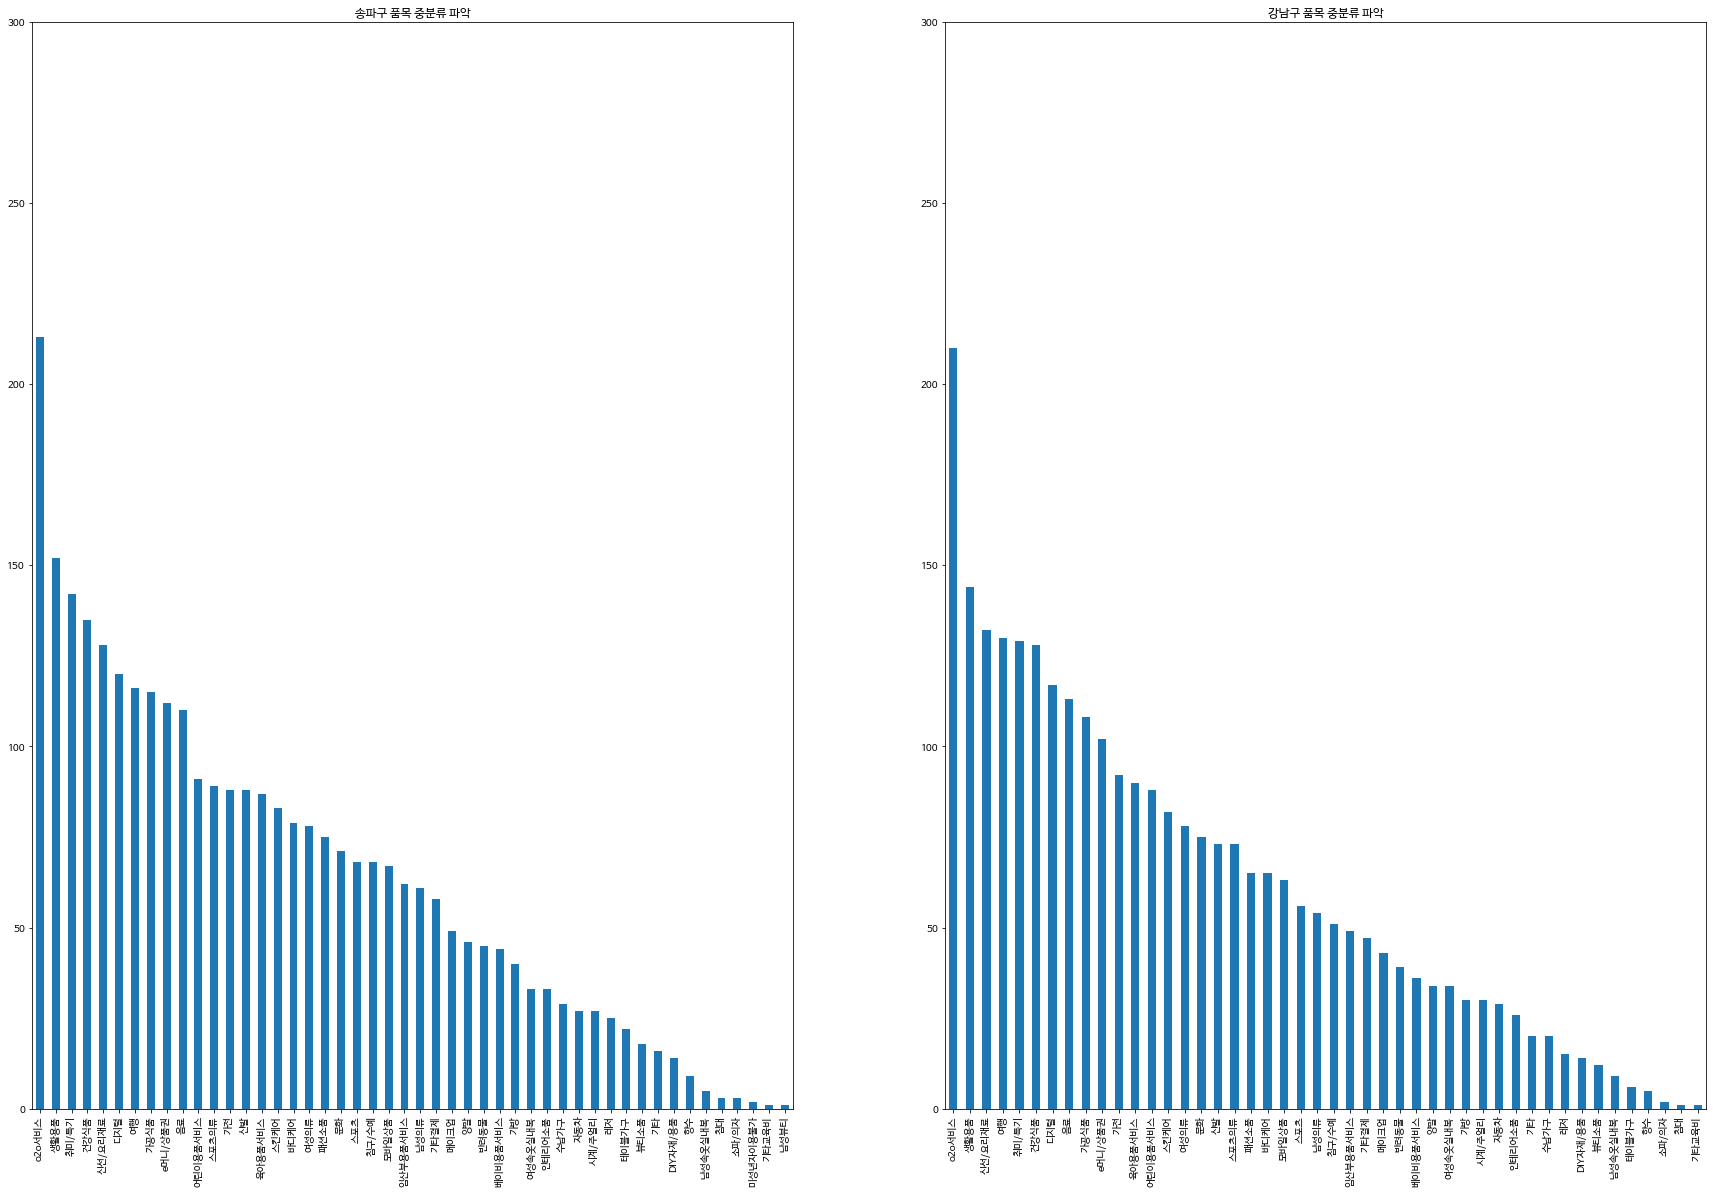

In [31]:
plt.figure(figsize = (30,20))

for j in range(len(cluster1_list)):
    plt.subplot(1,2,j+1)
    cluster1[j]['품목중분류명'].value_counts().plot.bar()
    plt.ylim([0, 300])
    plt.title(cluster1_list[j]+ ' 품목 중분류 파악')

plt.plot

In [32]:
# cluster == 2
df_1903_cluster2 = df_1903[df_1903['large_money_cluster'] == 2]
cluster2_list = []
cluster2_list = df_1903_cluster2['고객소재지_시군구'].unique()

print(cluster2_list)

iscluster2 = []
for i in range(len(cluster2_list)):
    iscluster2.append(df_1903_cluster2['고객소재지_시군구'] == cluster2_list[i])
    
cluster2 = []
for i in range(len(cluster2_list)):
    cluster2.append(df_1903_cluster2[iscluster2[i]])

['금천구' '용산구' '종로구' '중구']


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

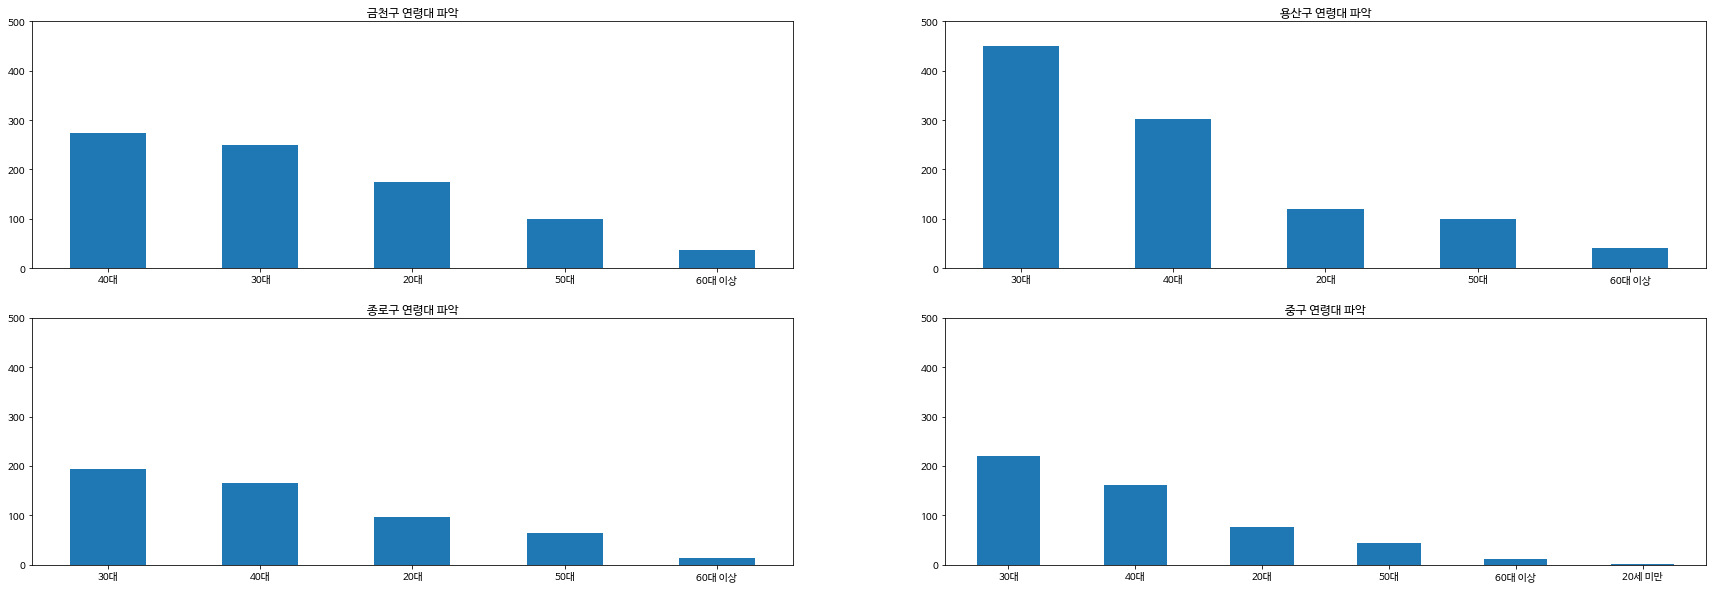

In [33]:
plt.figure(figsize = (30,10))

for j in range(len(cluster2_list)):
    plt.subplot(2,2,j+1)
    cluster2[j]['연령'].value_counts().plot.bar()
    plt.ylim([0, 500])
    plt.xticks(rotation=0)
    plt.title(cluster2_list[j]+ ' 연령대 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

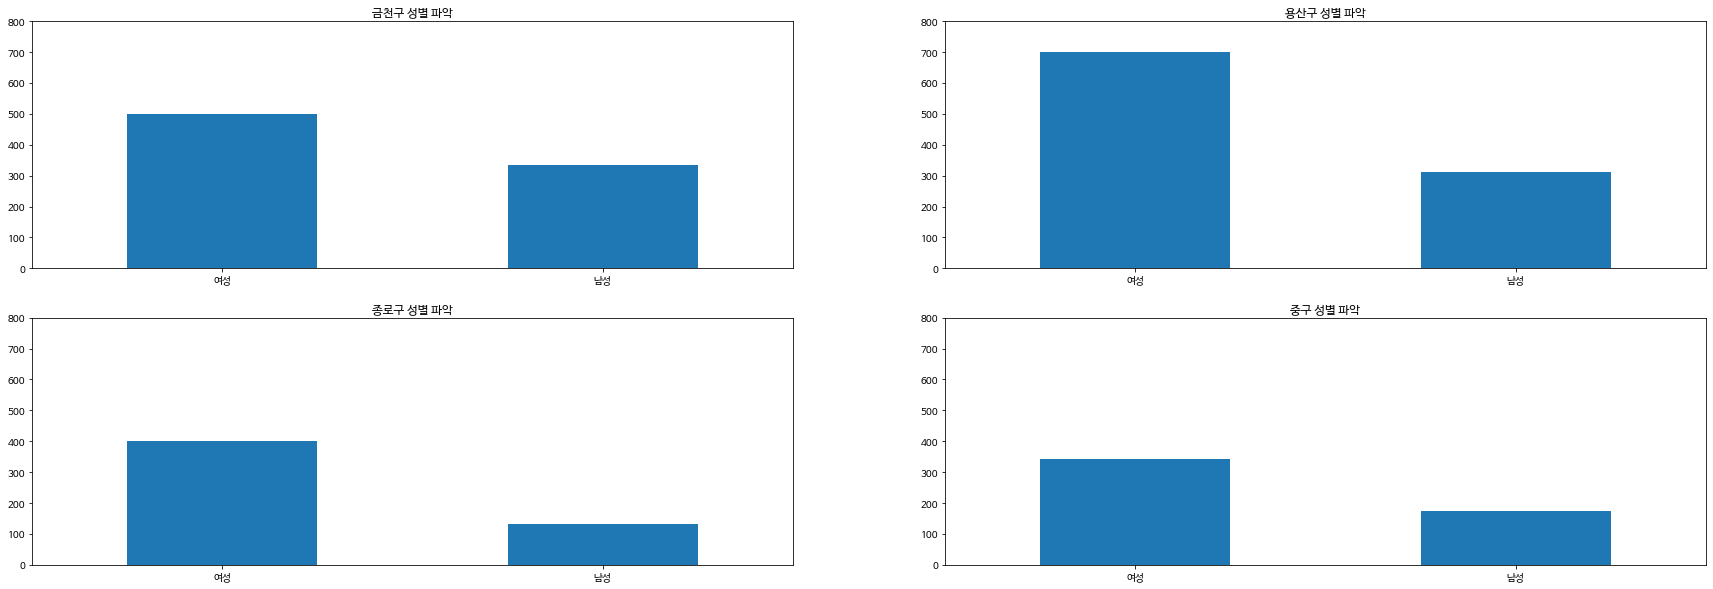

In [34]:
plt.figure(figsize = (30,10))

for j in range(len(cluster2_list)):
    plt.subplot(2,2,j+1)
    cluster2[j]['성별'].value_counts().plot.bar()
    plt.ylim([0, 800])
    plt.xticks(rotation=0)
    plt.title(cluster2_list[j]+ ' 성별 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

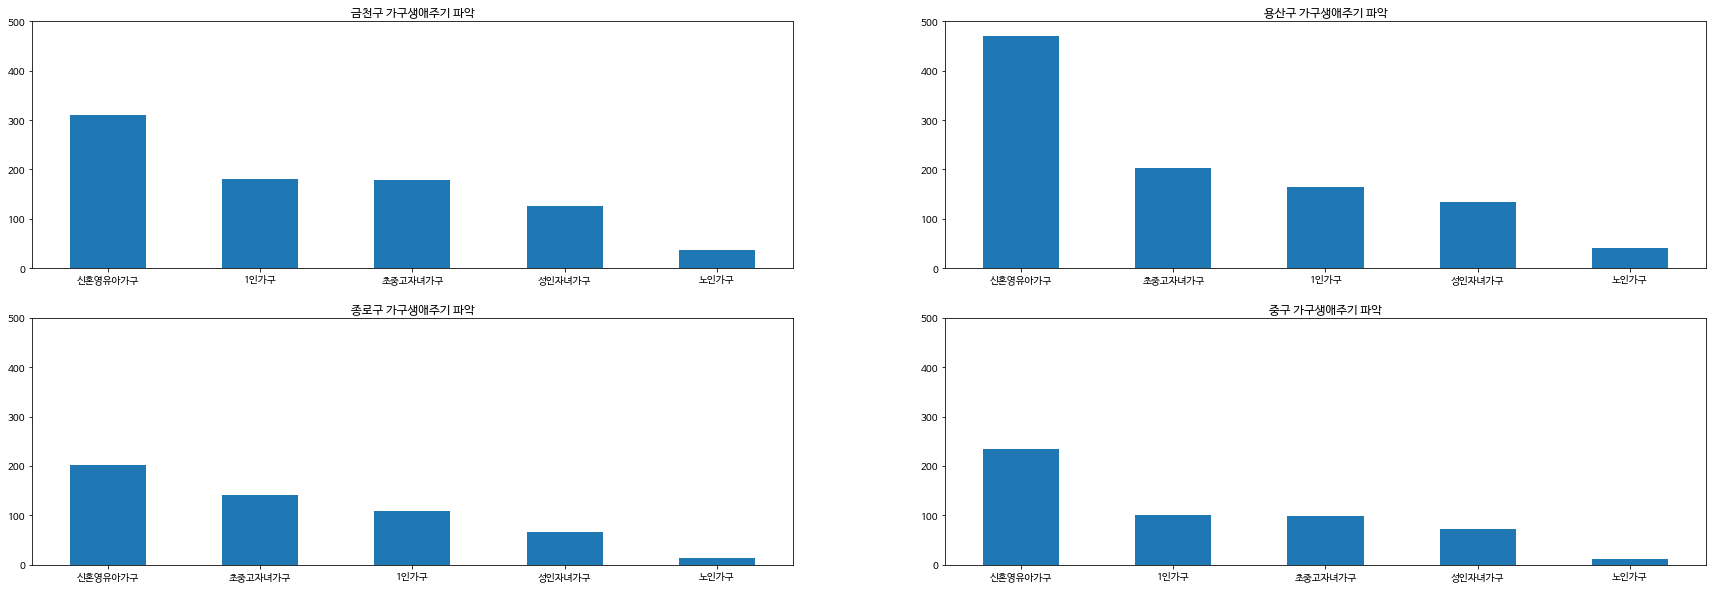

In [35]:
plt.figure(figsize = (30,10))

for j in range(len(cluster2_list)):
    plt.subplot(2,2,j+1)
    cluster2[j]['가구생애주기'].value_counts().plot.bar()
    plt.ylim([0, 500])
    plt.xticks(rotation=0)
    plt.title(cluster2_list[j]+ ' 가구생애주기 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

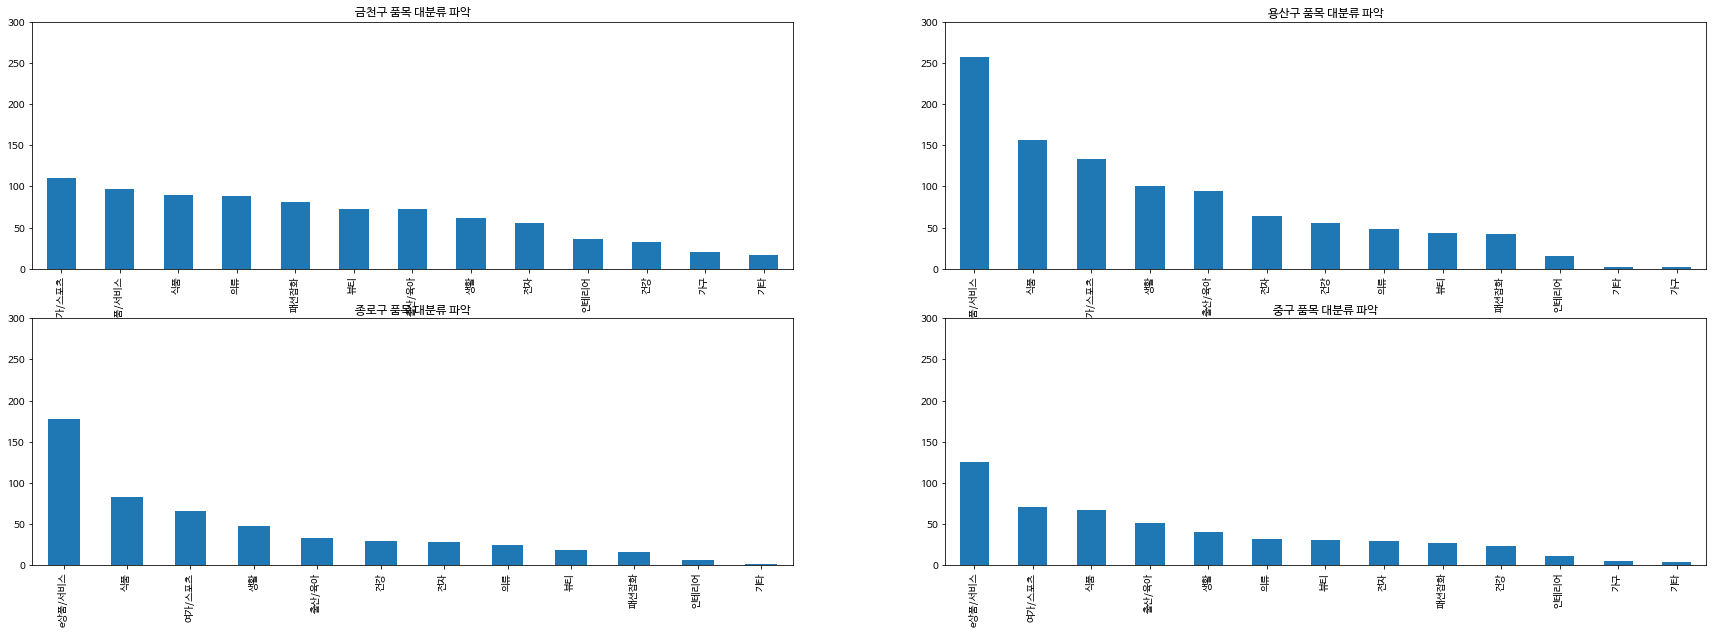

In [36]:
plt.figure(figsize = (30,10))

for j in range(len(cluster2_list)):
    plt.subplot(2,2,j+1)
    cluster2[j]['품목대분류명'].value_counts().plot.bar()
    plt.ylim([0, 300])
    plt.title(cluster2_list[j]+ ' 품목 대분류 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

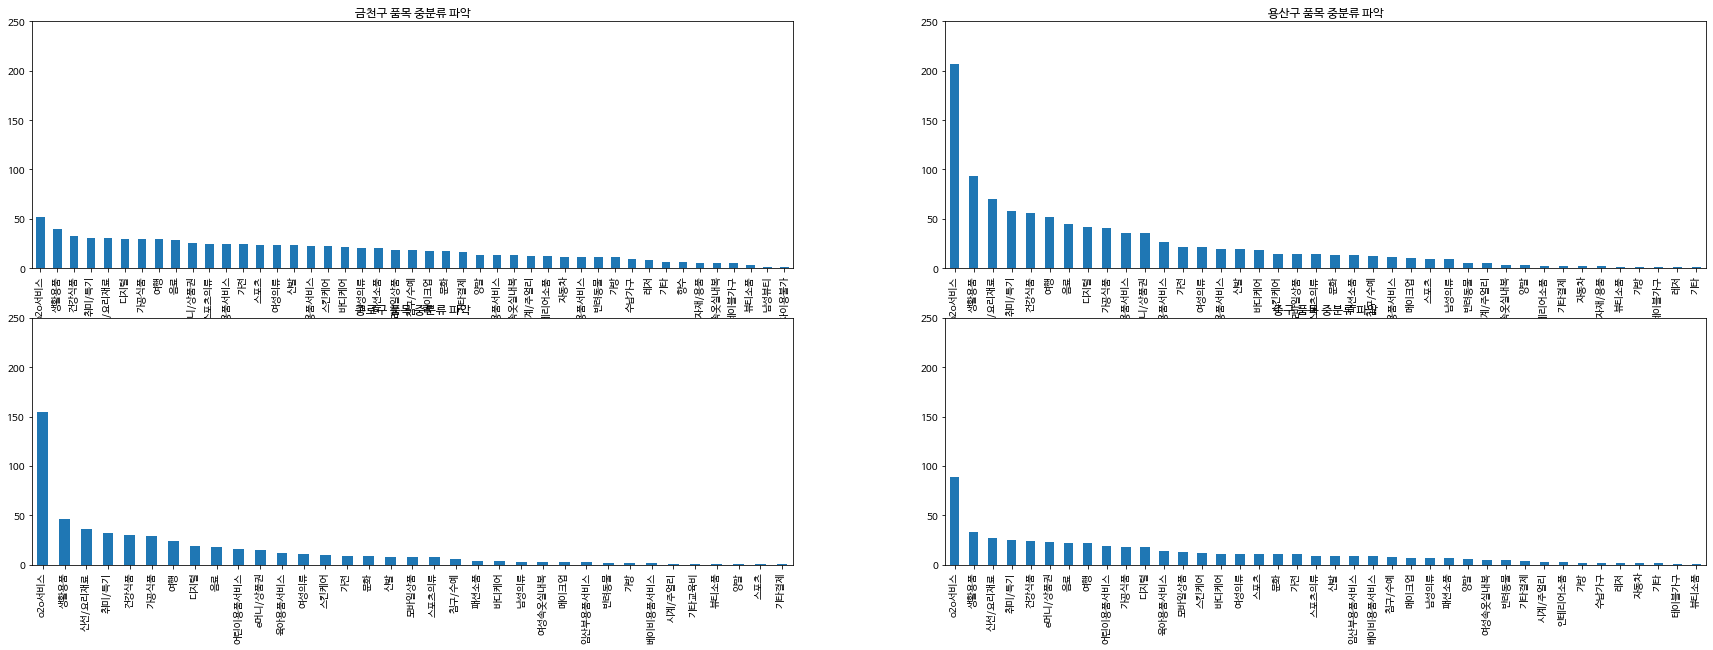

In [37]:
plt.figure(figsize = (30,10))

for j in range(len(cluster2_list)):
    plt.subplot(2,2,j+1)
    cluster2[j]['품목중분류명'].value_counts().plot.bar()
    plt.ylim([0, 250])
    plt.title(cluster2_list[j]+ ' 품목 중분류 파악')

plt.plot

In [38]:
# cluster == 3
df_1903_cluster3 = df_1903[df_1903['large_money_cluster'] == 3]
cluster3_list = []
cluster3_list = df_1903_cluster3['고객소재지_시군구'].unique()

print(cluster3_list)

iscluster3 = []
for i in range(len(cluster3_list)):
    iscluster3.append(df_1903_cluster3['고객소재지_시군구'] == cluster3_list[i])
    
cluster3 = []
for i in range(len(cluster3_list)):
    cluster3.append(df_1903_cluster3[iscluster3[i]])

['강서구' '관악구' '서초구']


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

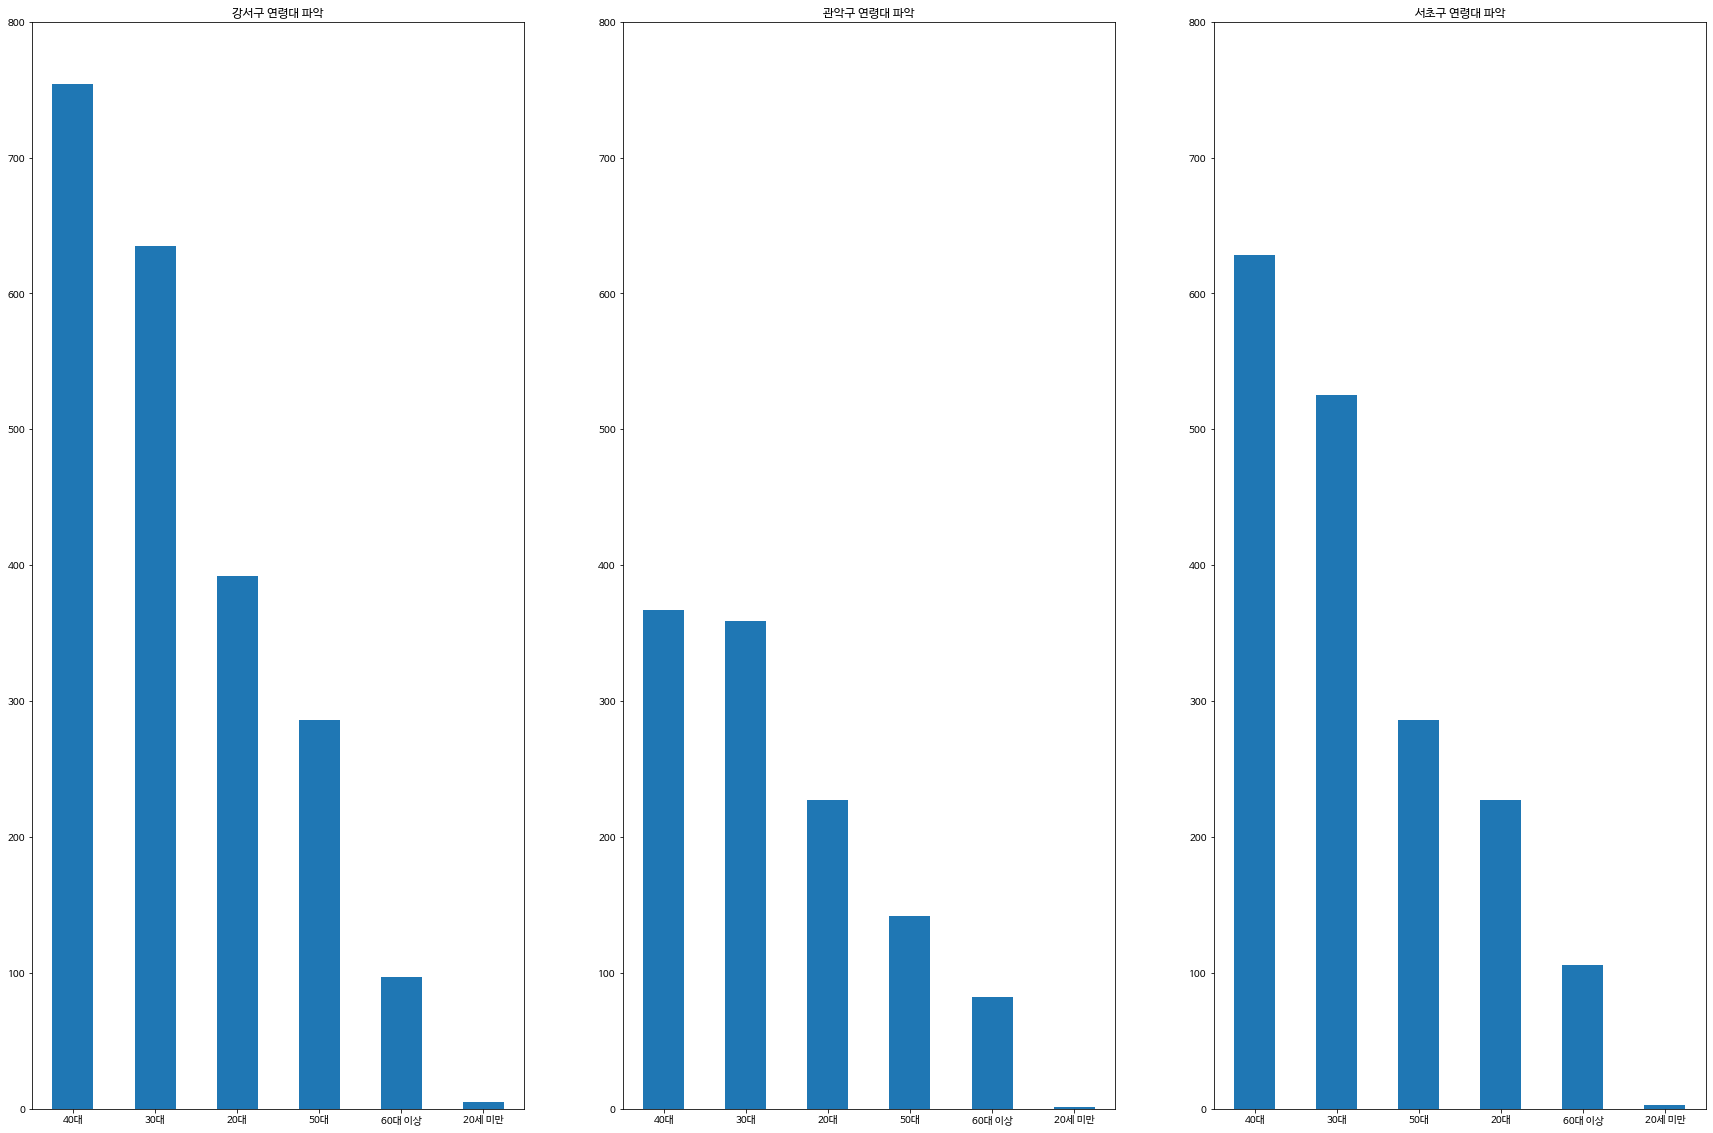

In [58]:
plt.figure(figsize = (30,20))

for j in range(len(cluster3_list)):
    plt.subplot(1,3,j+1)
    cluster3[j]['연령'].value_counts().plot.bar()
    plt.ylim([0, 800])
    plt.xticks(rotation=0)
    plt.title(cluster3_list[j]+ ' 연령대 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

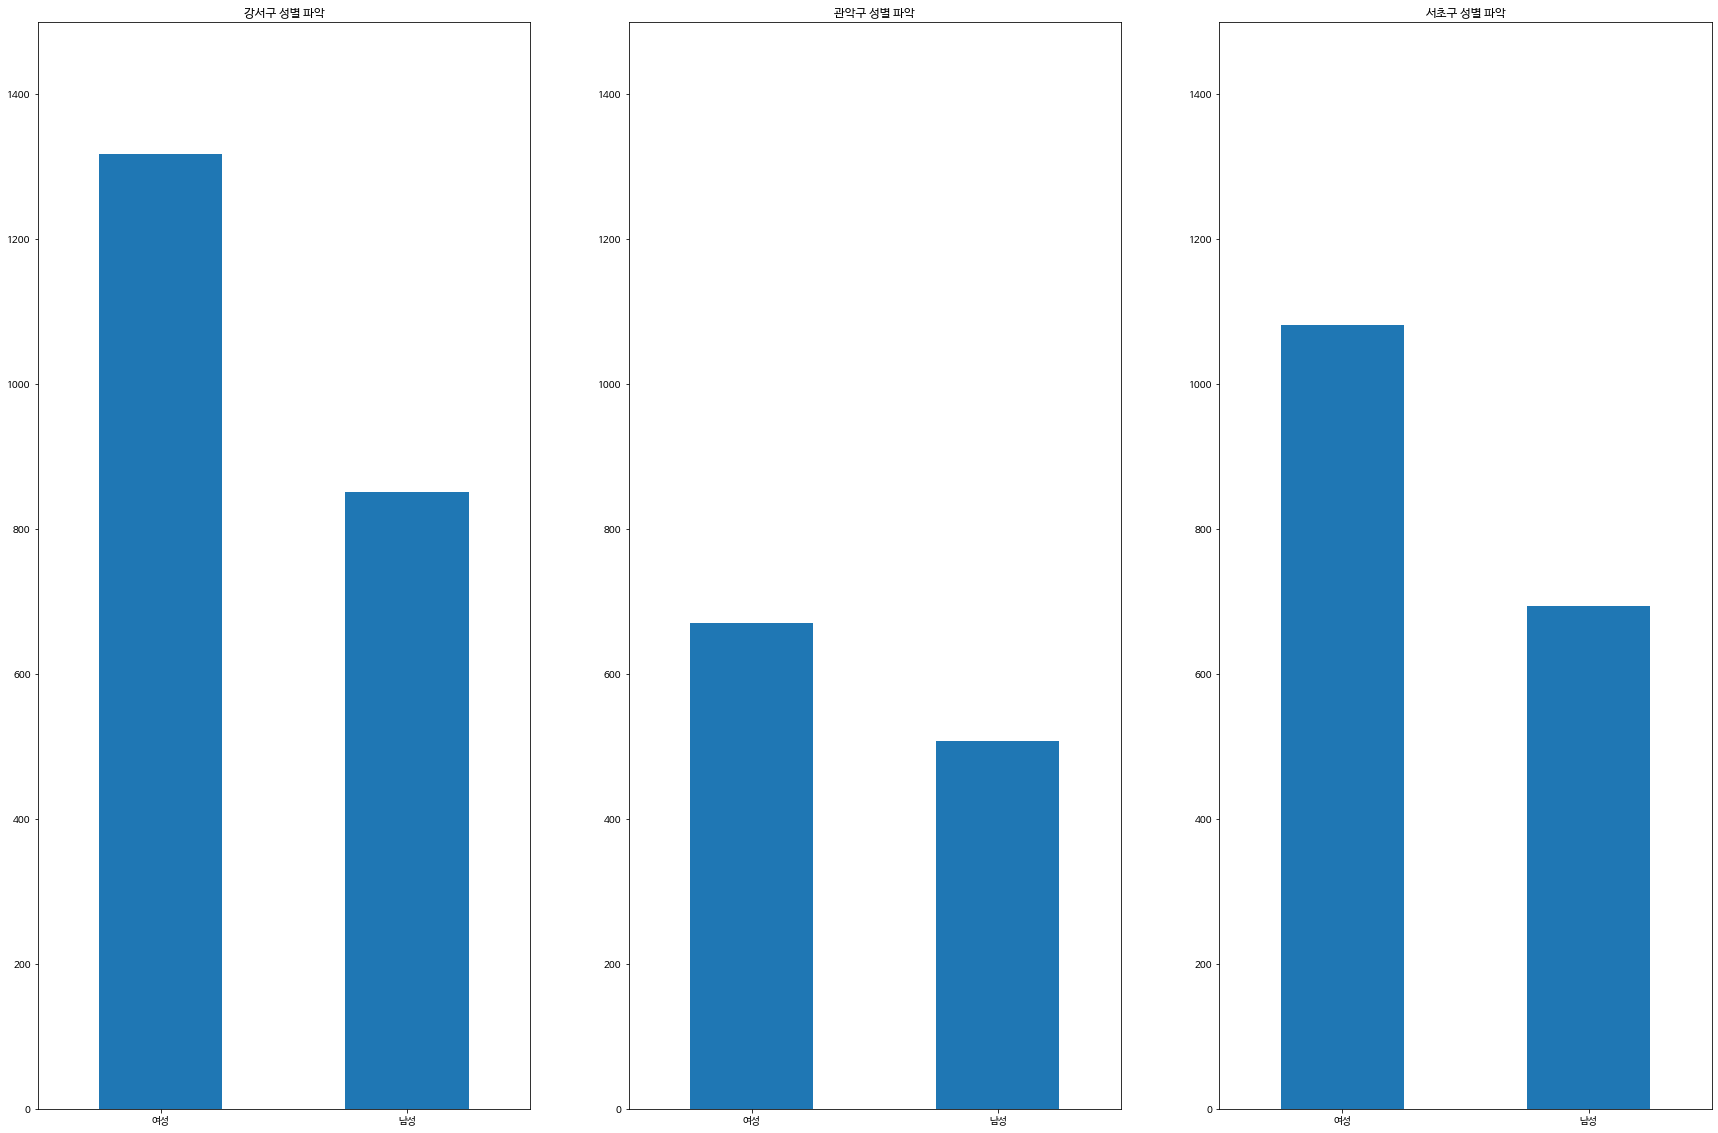

In [40]:
plt.figure(figsize = (30,20))

for j in range(len(cluster3_list)):
    plt.subplot(1,3,j+1)
    cluster3[j]['성별'].value_counts().plot.bar()
    plt.ylim([0, 1500])
    plt.xticks(rotation=0)
    plt.title(cluster3_list[j]+ ' 성별 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

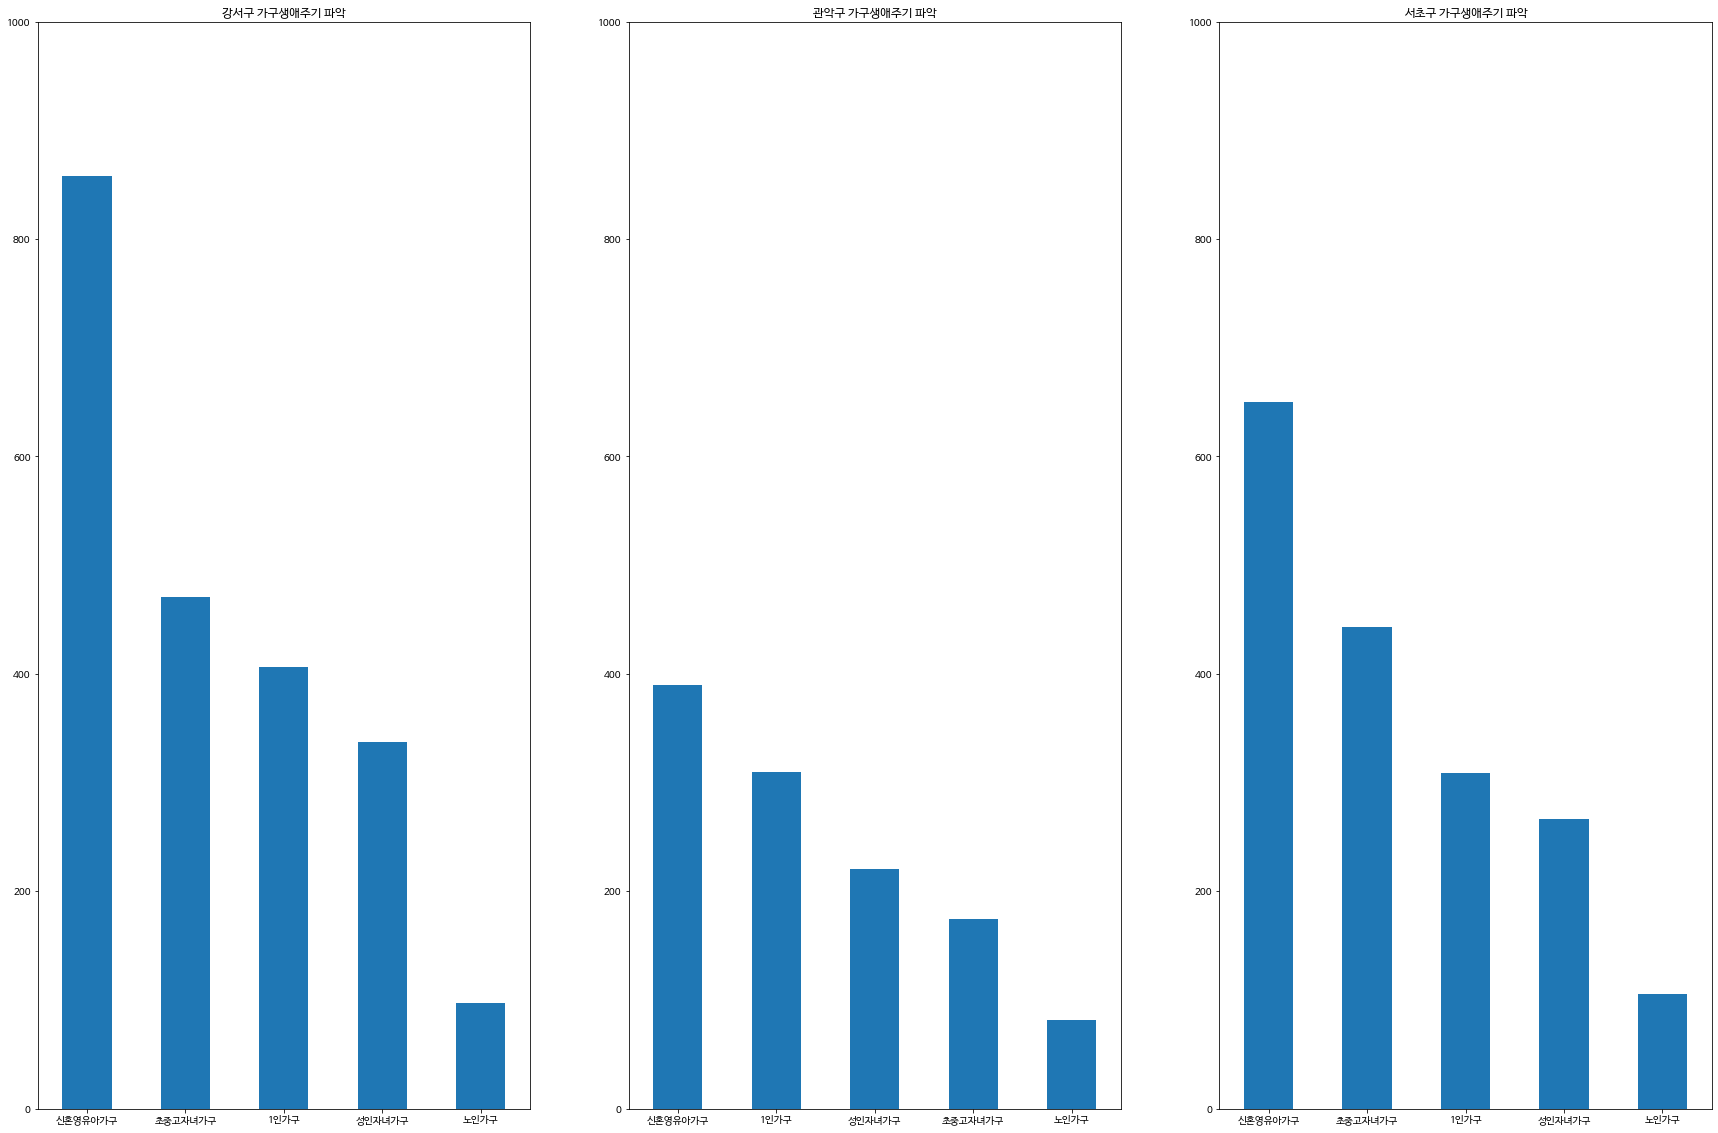

In [41]:
plt.figure(figsize = (30,20))

for j in range(len(cluster3_list)):
    plt.subplot(1,3,j+1)
    cluster3[j]['가구생애주기'].value_counts().plot.bar()
    plt.ylim([0, 1000])
    plt.xticks(rotation=0)
    plt.title(cluster3_list[j]+ ' 가구생애주기 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

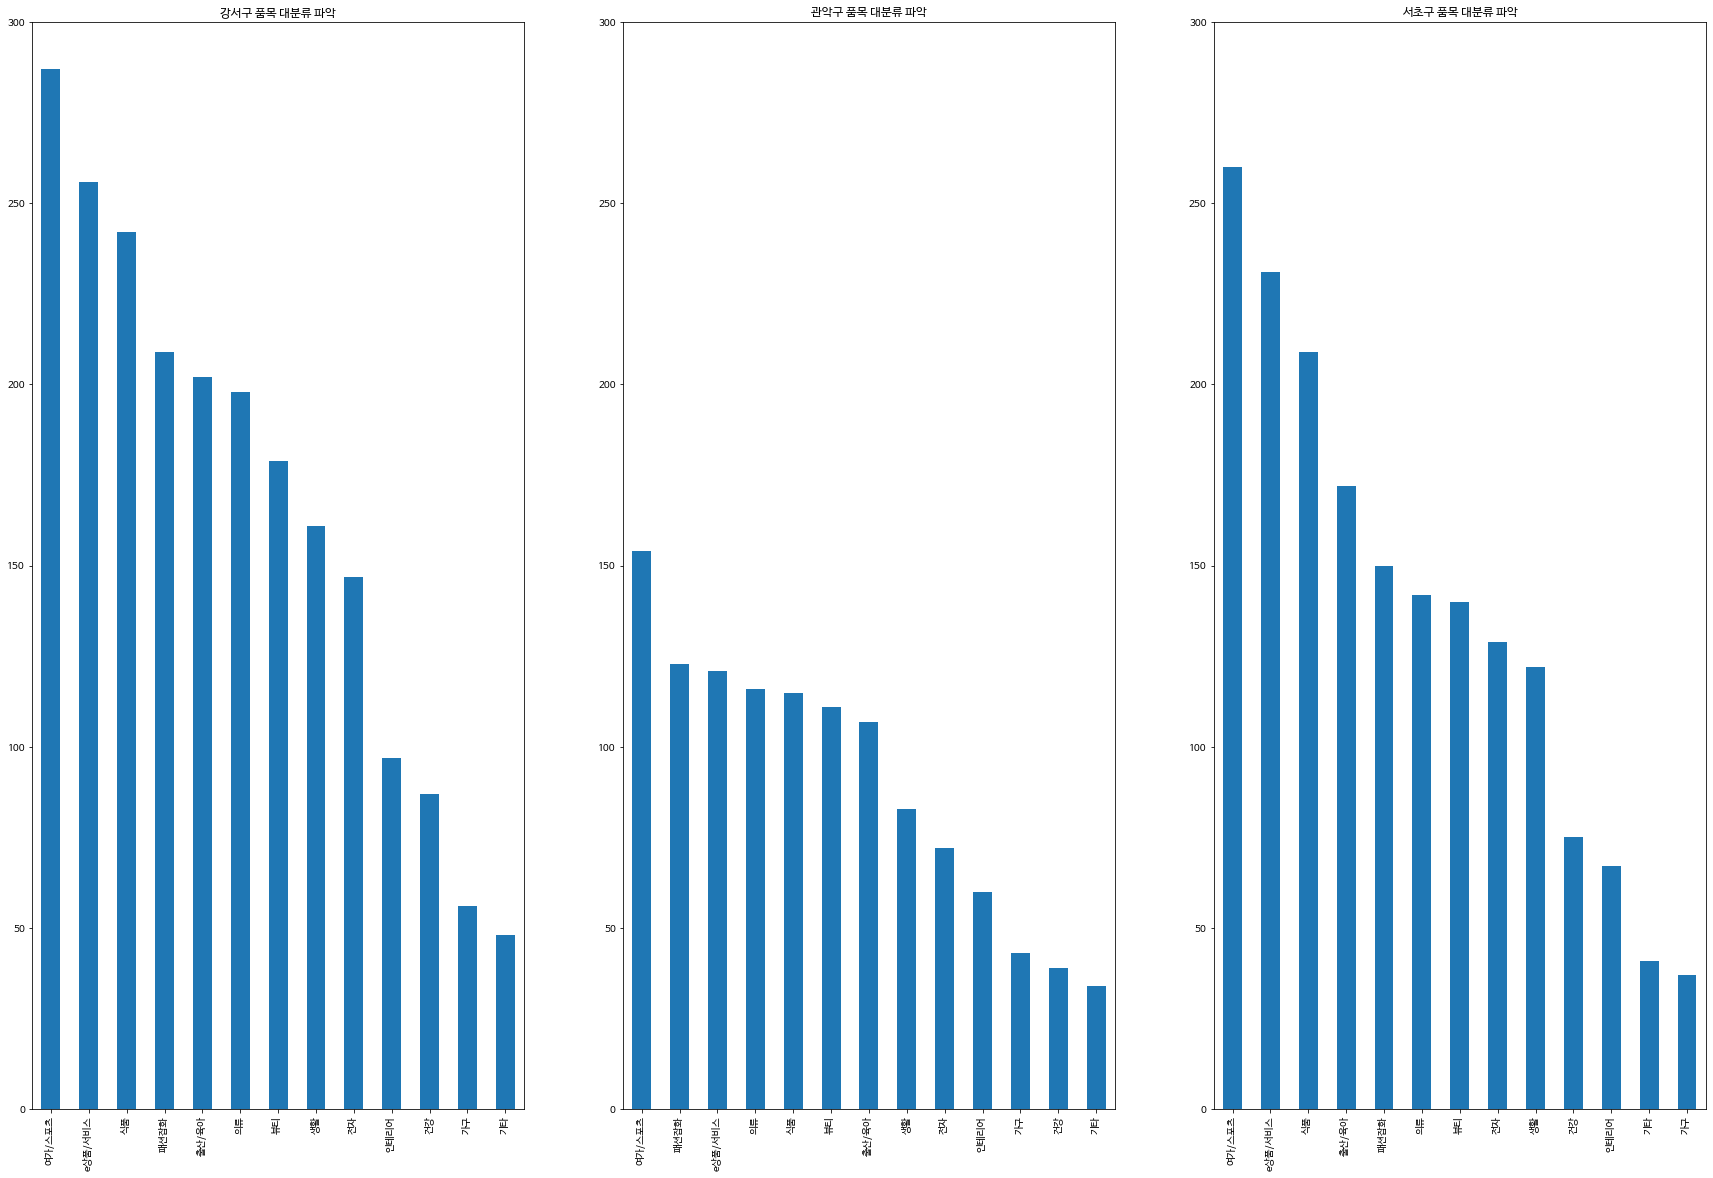

In [59]:
plt.figure(figsize = (30,20))

for j in range(len(cluster3_list)):
    plt.subplot(1,3,j+1)
    cluster3[j]['품목대분류명'].value_counts().plot.bar()
    plt.ylim([0, 300])
    plt.title(cluster3_list[j]+ ' 품목 대분류 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

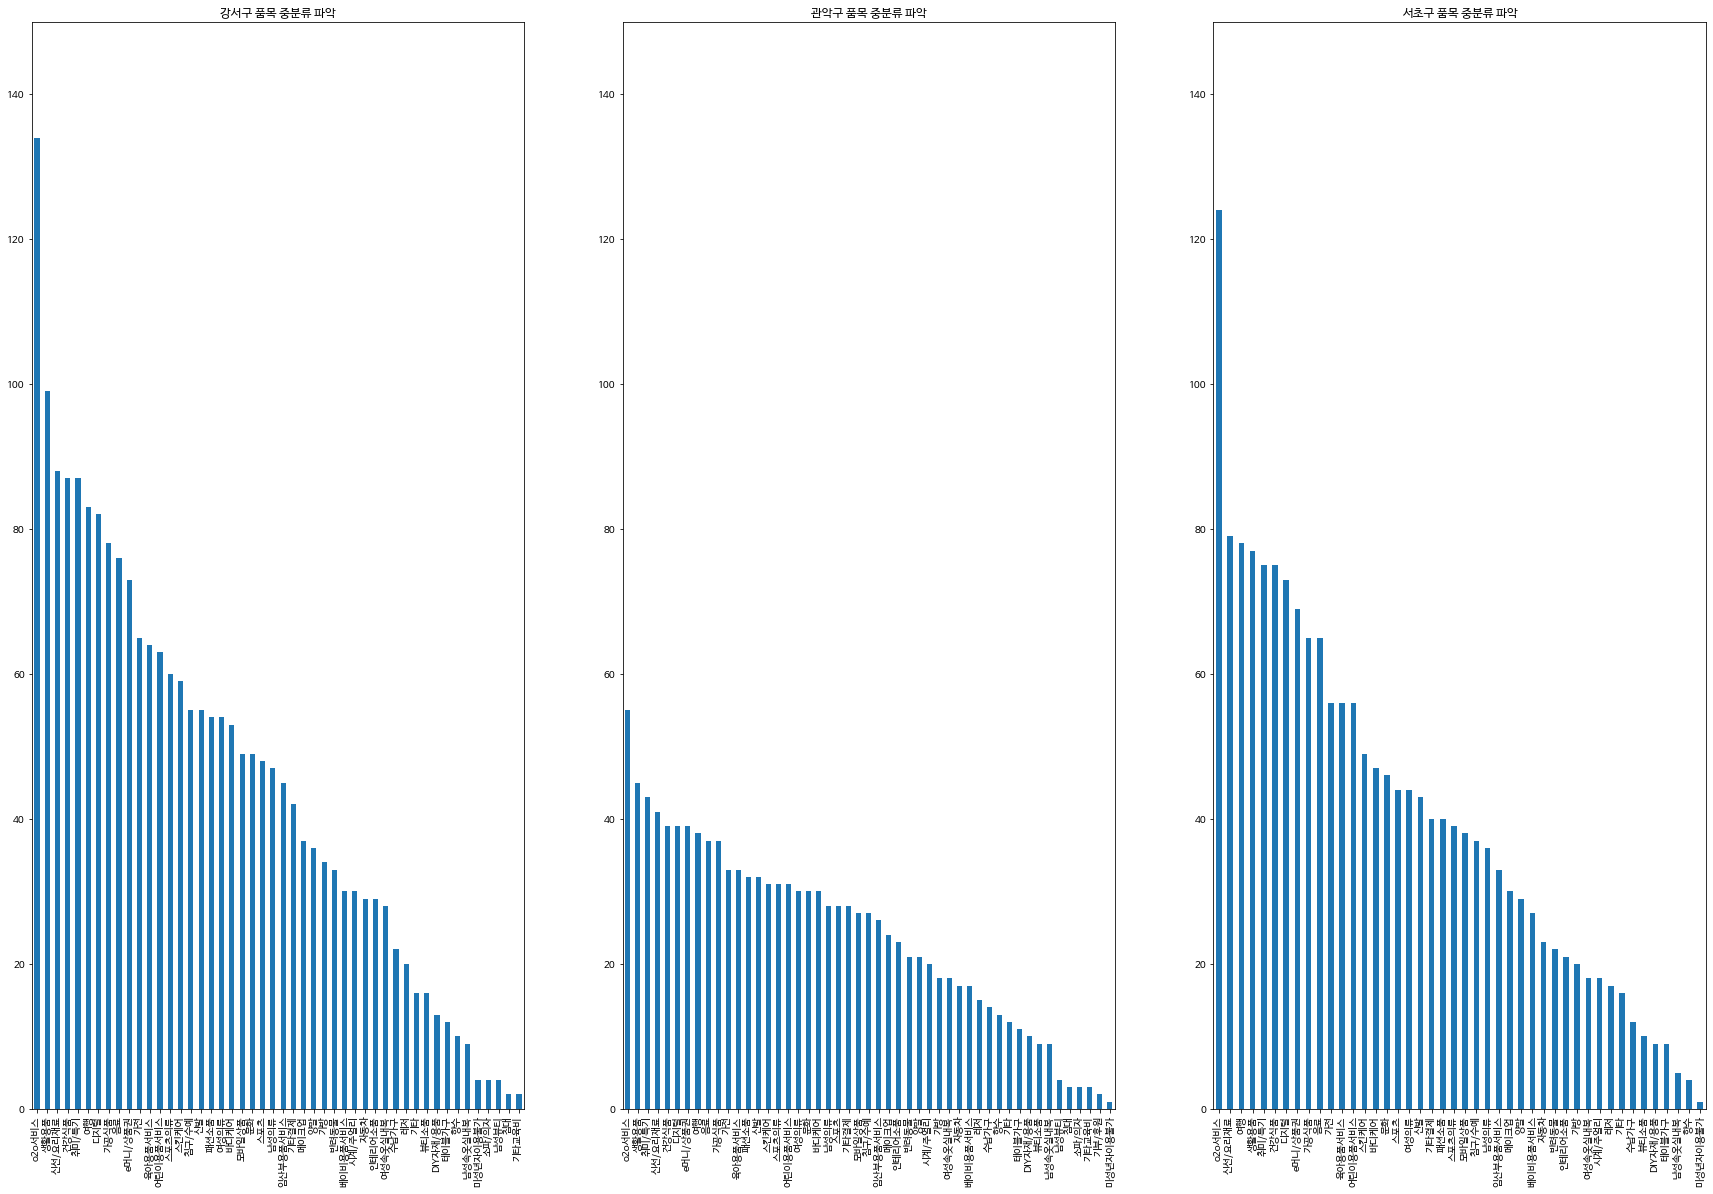

In [62]:
plt.figure(figsize = (30,20))

for j in range(len(cluster3_list)):
    plt.subplot(1,3,j+1)
    cluster3[j]['품목중분류명'].value_counts().plot.bar()
    plt.ylim([0, 150])
    plt.title(cluster3_list[j]+ ' 품목 중분류 파악')

plt.plot

In [44]:
# cluster == 4
df_1903_cluster4 = df_1903[df_1903['large_money_cluster'] == 4]
cluster4_list = []
cluster4_list = df_1903_cluster4['고객소재지_시군구'].unique()

print(cluster4_list)

iscluster4 = []
for i in range(len(cluster4_list)):
    iscluster4.append(df_1903_cluster4['고객소재지_시군구'] == cluster4_list[i])
    
cluster4 = []
for i in range(len(cluster4_list)):
    cluster4.append(df_1903_cluster4[iscluster4[i]])

['구로구' '강동구' '양천구' '동작구' '마포구' '은평구' '노원구' '영등포구']


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

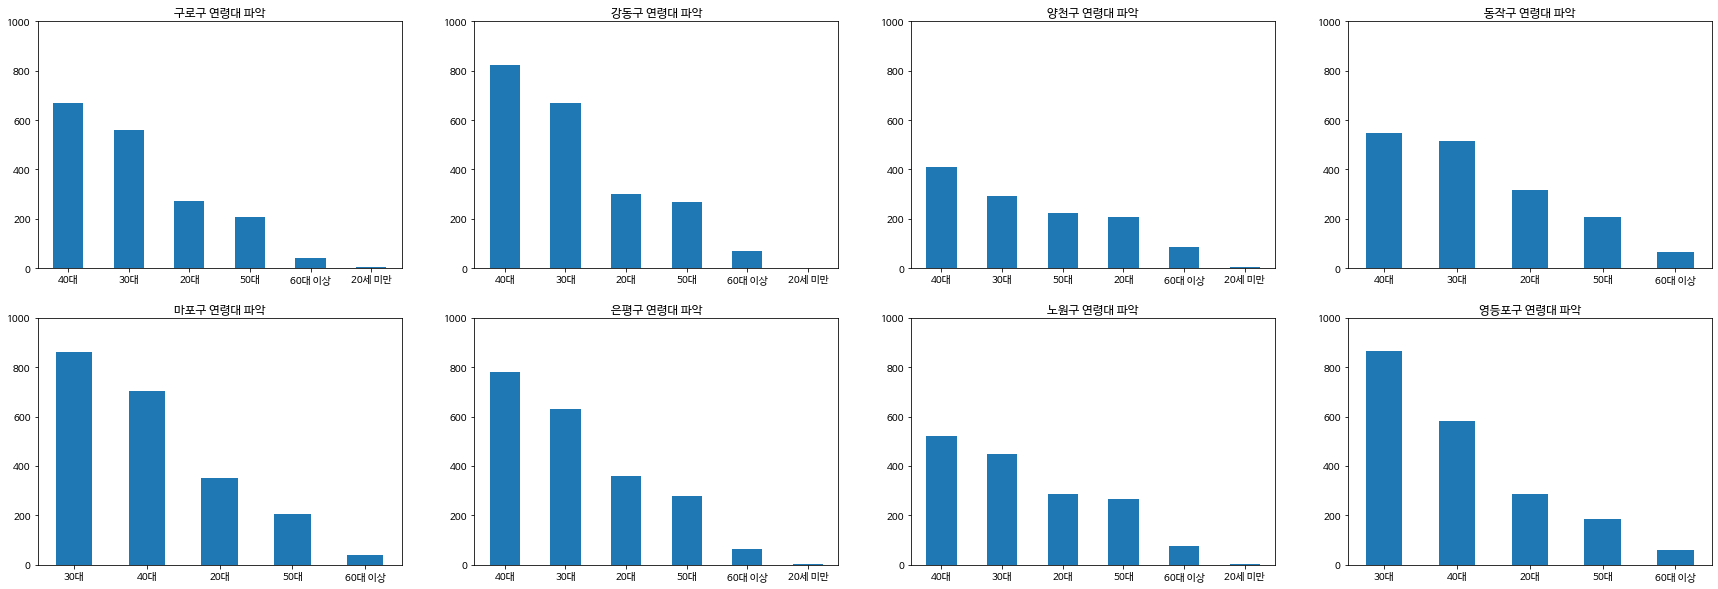

In [63]:
plt.figure(figsize = (30,10))

for j in range(len(cluster4_list)):
    plt.subplot(2,4,j+1)
    cluster4[j]['연령'].value_counts().plot.bar()
    plt.ylim([0, 1000])
    plt.xticks(rotation=0)
    plt.title(cluster4_list[j]+ ' 연령대 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

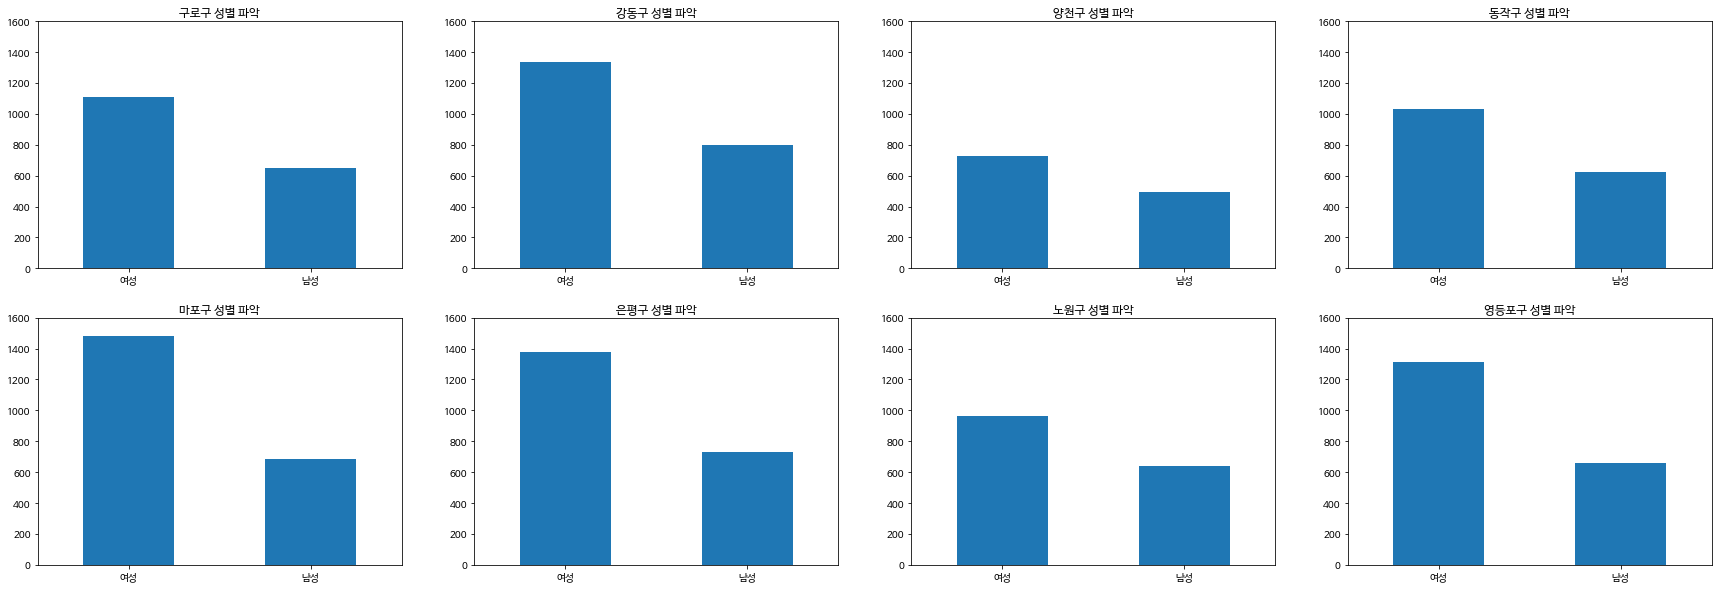

In [66]:
plt.figure(figsize = (30,10))

for j in range(len(cluster4_list)):
    plt.subplot(2,4,j+1)
    cluster4[j]['성별'].value_counts().plot.bar()
    plt.ylim([0, 1600])
    plt.xticks(rotation=0)
    plt.title(cluster4_list[j]+ ' 성별 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

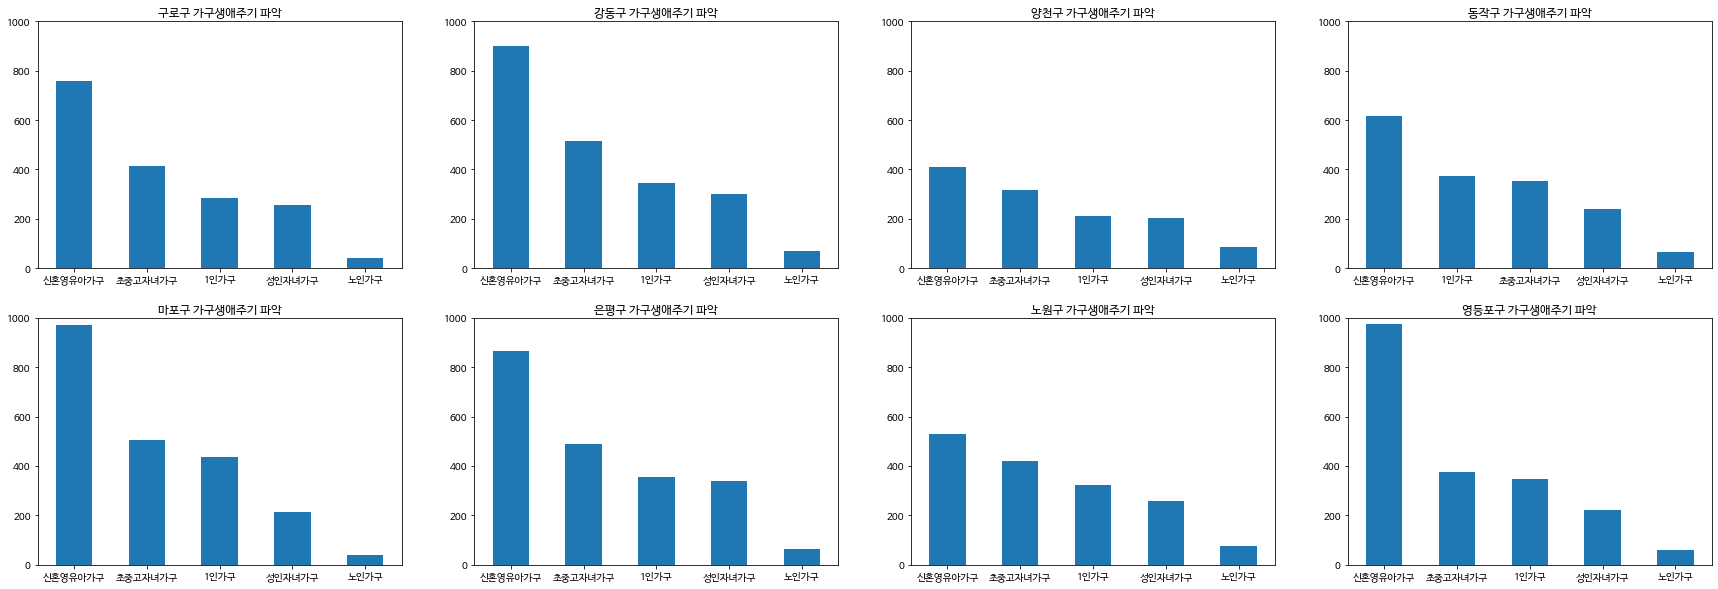

In [67]:
plt.figure(figsize = (30,10))

for j in range(len(cluster4_list)):
    plt.subplot(2,4,j+1)
    cluster4[j]['가구생애주기'].value_counts().plot.bar()
    plt.ylim([0, 1000])
    plt.xticks(rotation=0)
    plt.title(cluster4_list[j]+ ' 가구생애주기 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

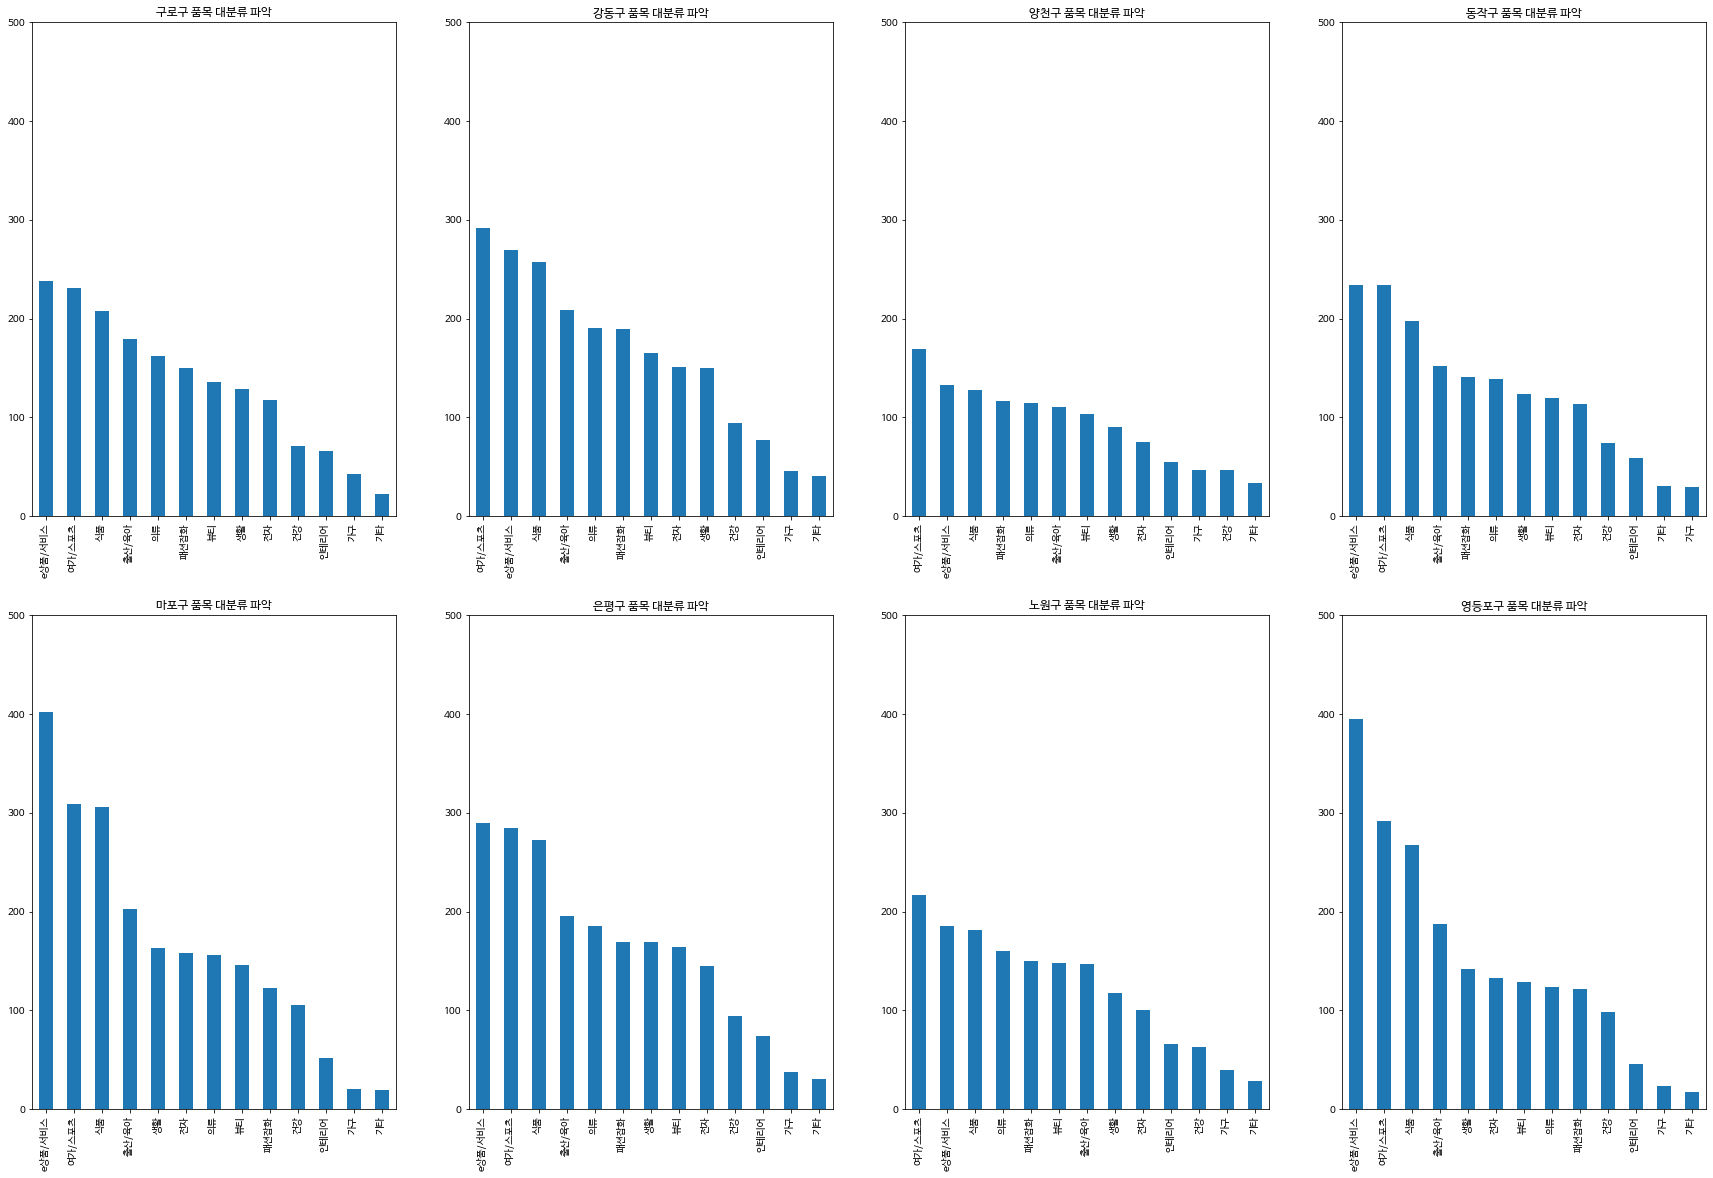

In [68]:
plt.figure(figsize = (30,20))

for j in range(len(cluster4_list)):
    plt.subplot(2,4,j+1)
    cluster4[j]['품목대분류명'].value_counts().plot.bar()
    plt.ylim([0, 500])
    plt.title(cluster4_list[j]+ ' 품목 대분류 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

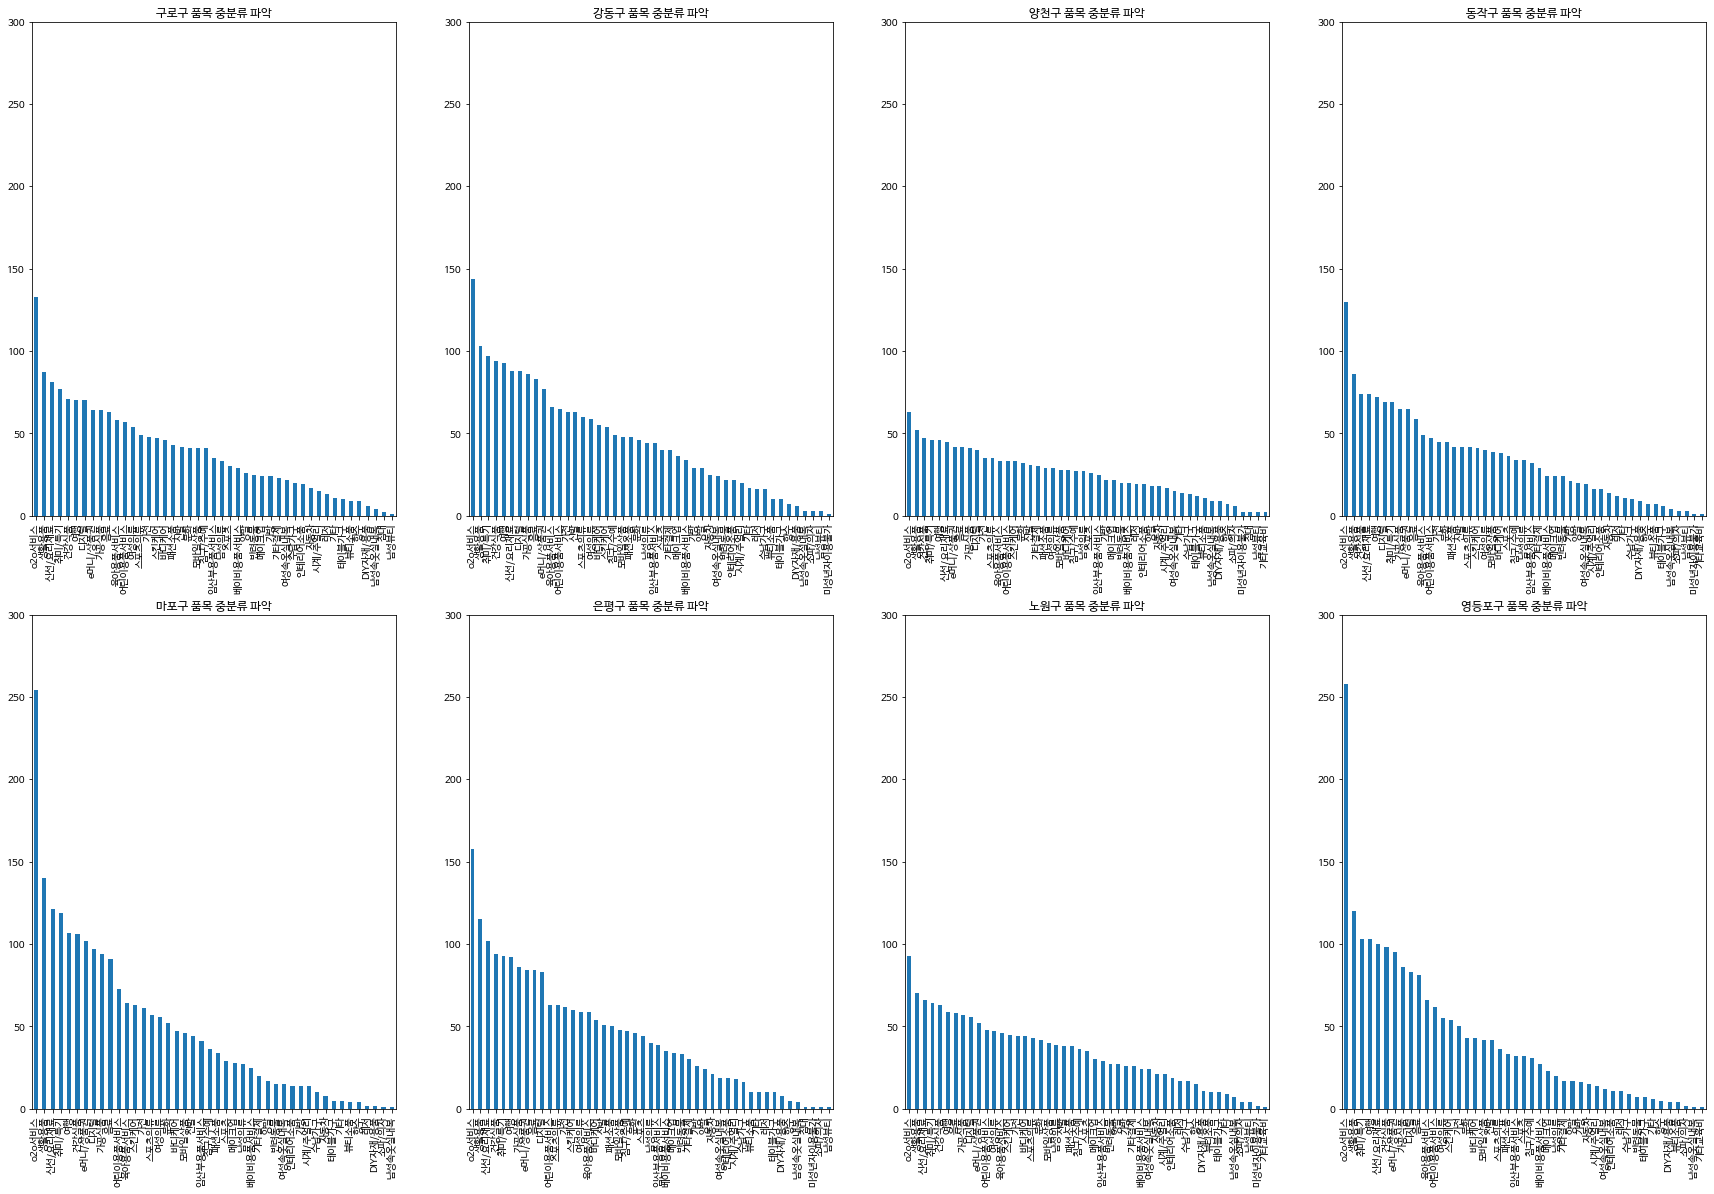

In [69]:
plt.figure(figsize = (30,20))

for j in range(len(cluster4_list)):
    plt.subplot(2,4,j+1)
    cluster4[j]['품목중분류명'].value_counts().plot.bar()
    plt.ylim([0, 300])
    plt.title(cluster4_list[j]+ ' 품목 중분류 파악')

plt.plot